# 1. Load in Libraries

In [18]:
#!pip install squarify
#!pip install textacy
#!pip install emot
#!pip install emoji
#!pip3 install pmdarima


import nltk
from nltk.tokenize import word_tokenize  
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
nlp = spacy.load('en_core_web_sm')
from  textacy import preprocessing as tprep
import gensim

import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import os
#os.chdir('C:/Users/T430/Google Drive/00 - Masters/Disseration/00 - Actual Disseration')
from itertools import chain
import pandas as pd
from nltk import word_tokenize
from nltk import FreqDist
#from emot.emo_unicode import UNICODE_EMOJI, EMOTICONS_EMO
import emoji

In [7]:
df['text']

0         what the fuck why didn't gamestop fucking proc...
1         what the fuck why didn't gamestop fucking proc...
2         i'll just go to gamestop and nab this $20 game...
3         couldn't get my ps4 today because aparently yo...
4         so i was cleaning up and found an unused $20 g...
                                ...                        
162692            just bought my milk crate set at gamestop
162693    shfs just take the l and let us close above 17...
162694    help my dick is stuck in a bellsprout she wont...
162695    let’s go $sndl!! #gme #tsla #amc let’s get it ...
162696                   just applied to a gamestop job lol
Name: text, Length: 162697, dtype: object

In [8]:
import sys
import io

sys.stdout = io.open(sys.stdout.fileno(), 'w', encoding='utf8')
print("é, à, ...")

UnsupportedOperation: fileno

In [9]:
SMILEYS = {u":‑)":"Happy_face",
u":-))":"Elated_face",
u":-)))":"Overjoyed_face",
u":)":"Happy_face",
u":))":"Elated_face",
u":)))":"Overjoyed_face",
u":-]":"Happy_face",
u":]":"Happy_face",
u":-3":"Happy_face_",
u":3":"Happy_face_",
u":->":"Happy_face_",
u":>":"Happy_face_",
u"8-)":"Happy_face_",
u":o)":"Happy_face_",
u":-}":"Happy_face_",
u":}":"Happy_face_",
u":-)":"Happy_face_",
u":c)":"Happy_face_",
u":^)":"Happy_face_",
u"=]":"Happy_face_",
u"=)":"Happy_face_",
u":‑D":"Laughing",
u":D":"Laughing",
u"8‑D":"Laughing",
u"8D":"Laughing",
u"X‑D":"Laughing",
u"XD":"Laughing",
u"=D":"Laughing",
u"=3":"Laughing",
u"B^D":"Laughing",
u":-))":"Elated_face",
u":-(":"sad_face",
u":‑(":"sad_face",
u":(":"sad_face",
u":‑c":"sad_face",
u":c":"sad_face",
u":‑<":"sad_face",
u":<":"sad_face",
u":‑[":"sad_face",
u":[":"sad_face",
u":-||":"sad_face",
u">:[":"sad_face",
u":{":"sad_face",
u":@":"sad_face",
u">:(":"sad_face",
u":'‑(":"Crying",
u":'(":"Crying",
u":'‑)":"happy_face",
u":')":"happy_face",
u"D‑':":"Horror",
u"D:<":"Disgust",
u"D:":"Sadness",
u"D8":"Great_dismay",
u"D;":"Great_dismay",
u"D=":"Great_dismay",
u"DX":"Great_dismay",
u":‑O":"Surprise",
u":O":"Surprise",
u":‑o":"Surprise",
u":o":"Surprise",
u":-0":"Shock",
u"8‑0":"Yawn",
u">:O":"Yawn",
u":-*":"Kiss",
u":*":"Kiss",
u":X":"Kiss",
u";‑)":"Wink_or_smirk",
u";)":"Wink_or_smirk",
u"*-)":"Wink_or_smirk",
u"*)":"Wink_or_smirk",
u";‑]":"Wink_or_smirk",
u";]":"Wink_or_smirk",
u";^)":"Wink_or_smirk",
u":‑,":"Wink_or_smirk",
u";D":"Wink_or_smirk",
u":‑P":"Tongue_sticking_out,_cheeky,_playful_or_blowing_a_raspberry",
u":P":"Tongue_sticking_out,_cheeky,_playful_or_blowing_a_raspberry",
u"X‑P":"Tongue_sticking_out,_cheeky,_playful_or_blowing_a_raspberry",
u"XP":"Tongue_sticking_out,_cheeky,_playful_or_blowing_a_raspberry",
u":‑Þ":"Tongue_sticking_out,_cheeky,_playful_or_blowing_a_raspberry",
u":Þ":"Tongue_sticking_out,_cheeky,_playful_or_blowing_a_raspberry",
u":b":"Tongue_sticking_out,_cheeky,_playful_or_blowing_a_raspberry",
u"d:":"Tongue_sticking_out,_cheeky,_playful_or_blowing_a_raspberry",
u"=p":"Tongue_sticking_out,_cheeky,_playful_or_blowing_a_raspberry",
u">:P":"Tongue_sticking_out,_cheeky,_playful_or_blowing_a_raspberry",
u":‑/":"Skeptical,_annoyed,_undecided,_uneasy_or_hesitant",
u":/":"Skeptical,_annoyed,_undecided,_uneasy_or_hesitant",
u":-[.]":"Skeptical,_annoyed,_undecided,_uneasy_or_hesitant",
u">:[(\)]":"Skeptical,_annoyed,_undecided,_uneasy_or_hesitant",
u">:/":"Skeptical,_annoyed,_undecided,_uneasy_or_hesitant",
u":[(\)]":"Skeptical,_annoyed,_undecided,_uneasy_or_hesitant",
u"=/":"Skeptical,_annoyed,_undecided,_uneasy_or_hesitant",
u"=[(\)]":"Skeptical,_annoyed,_undecided,_uneasy_or_hesitant",
u":L":"Skeptical,_annoyed,_undecided,_uneasy_or_hesitant",
u"=L":"Skeptical,_annoyed,_undecided,_uneasy_or_hesitant",
u":S":"Skeptical,_annoyed,_undecided,_uneasy_or_hesitant",
u":‑|":"Straight_face",
u":|":"Straight_face",
u":$":"Embarrassed_or_blushing",
u":‑x":"Sealed_lips_or_wearing_braces_or_tongue-tied",
u":x":"Sealed_lips_or_wearing_braces_or_tongue-tied",
u":‑#":"Sealed_lips_or_wearing_braces_or_tongue-tied",
u":#":"Sealed_lips_or_wearing_braces_or_tongue-tied",
u":‑&":"Sealed_lips_or_wearing_braces_or_tongue-tied",
u":&":"Sealed_lips_or_wearing_braces_or_tongue-tied",
u"O:‑)":"Angel,_saint_or_innocent",
u"O:)":"Angel,_saint_or_innocent",
u"0:‑3":"Angel,_saint_or_innocent",
u"0:3":"Angel,_saint_or_innocent",
u"0:‑)":"Angel,_saint_or_innocent",
u"0:)":"Angel,_saint_or_innocent",
u":‑b":"Tongue_sticking_out,_cheeky,_playful_or_blowing_a_raspberry",
u"0;^)":"Angel,_saint_or_innocent",
u">:‑)":"Evil_or_devilish",
u">:)":"Evil_or_devilish",
u"}:‑)":"Evil_or_devilish",
u"}:)":"Evil_or_devilish",
u"3:‑)":"Evil_or_devilish",
u"3:)":"Evil_or_devilish",
u">;)":"Evil_or_devilish",
u"|;‑)":"Cool",
u"|‑O":"Bored",
u":‑J":"Tongue-in-cheek",
u"#‑)":"Party_all_night",
u"%‑)":"Drunk_or_confused",
u"%)":"Drunk_or_confused",
u":-###..":"Being_sick",
u":###..":"Being_sick",
u"<:‑|":"Dump",
u"(>_<)":"Troubled",
u"(>_<)>":"Troubled",
u"(';')":"Baby",
u"(^^>``":"Nervous_or_Embarrassed_or_Troubled_or_Shy_or_Sweat_drop",
u"(^_^;)":"Nervous_or_Embarrassed_or_Troubled_or_Shy_or_Sweat_drop",
u"(-_-;)":"Nervous_or_Embarrassed_or_Troubled_or_Shy_or_Sweat_drop",
u"(~_~;)_(・.・;)":"Nervous_or_Embarrassed_or_Troubled_or_Shy_or_Sweat_drop",
u"(-_-)zzz":"Sleeping",
u"(^_-)":"Wink",
u"((+_+))":"Confused",
u"(+o+)":"Confused",
u"(o|o)":"Ultraman",
u"^_^":"Joyful",
u"(^_^)/":"Joyful",
u"(^O^)／":"Joyful",
u"(^o^)／":"Joyful",
u"(__)":"Kowtow_as_a_sign_of_respect,_or_dogeza_for_apology",
u"_(._.)_":"Kowtow_as_a_sign_of_respect,_or_dogeza_for_apology",
u"<(___)>":"Kowtow_as_a_sign_of_respect,_or_dogeza_for_apology",
u"<m(__)m>":"Kowtow_as_a_sign_of_respect,_or_dogeza_for_apology",
u"m(__)m":"Kowtow_as_a_sign_of_respect,_or_dogeza_for_apology",
u"m(___)m":"Kowtow_as_a_sign_of_respect,_or_dogeza_for_apology",
u"('_')":"Sad_or_Crying",
u"(/_;)":"Sad_or_Crying",
u"(T_T)_(;_;)":"Sad_or_Crying",
u"(;_;":"Sad_of_Crying",
u"(;_:)":"Sad_or_Crying",
u"(;O;)":"Sad_or_Crying",
u"(:_;)":"Sad_or_Crying",
u"(ToT)":"Sad_or_Crying",
u";_;":"Sad_or_Crying",
u";-;":"Sad_or_Crying",
u";n;":"Sad_or_Crying",
u";;":"Sad_or_Crying",
u"Q.Q":"Sad_or_Crying",
u"T.T":"Sad_or_Crying",
u"QQ":"Sad_or_Crying",
u"Q_Q":"Sad_or_Crying",
u"(-.-)":"Shame",
u"(-_-)":"Shame",
u"(一一)":"Shame",
u"(；一_一)":"Shame",
u"(=_=)":"Tired",
u"(=^·^=)":"cat",
u"(=^··^=)":"cat",
u"=_^=_":"cat",
u"(..)":"Looking_down",
u"(._.)":"Looking_down",
u"^m^":"Giggling_with_hand_covering_mouth",
u"(・・?":"Confusion",
u"(?_?)":"Confusion",
u">^_^<":"Normal_Laugh",
u"<^!^>":"Normal_Laugh",
u"^/^":"Normal_Laugh",
u"（*^_^*）":"Normal_Laugh",
u"(^<^)_(^.^)":"Normal_Laugh",
u"(^^)":"Normal_Laugh",
u"(^.^)":"Normal_Laugh",
u"(^_^.)":"Normal_Laugh",
u"(^_^)":"Normal_Laugh",
u"(^^)":"Normal_Laugh",
u"(^J^)":"Normal_Laugh",
u"(*^.^*)":"Normal_Laugh",
u"(^—^）":"Normal_Laugh",
u"(#^.^#)":"Normal_Laugh",
u"（^—^）":"Waving",
u"(;_;)/~~~":"Waving",
u"(^.^)/~~~":"Waving",
u"(-_-)/~~~_($··)/~~~":"Waving",
u"(T_T)/~~~":"Waving",
u"(ToT)/~~~":"Waving",
u"(*^0^*)":"Excited",
u"(*_*)":"Amazed",
u"(*_*;":"Amazed",
u"(+_+)_(@_@)":"Amazed",
u"(*^^)v":"Laughing,Cheerful",
u"(^_^)v":"Laughing,Cheerful",
u"((d[-_-]b))":"Headphones,Listening_to_music",
u'(-"-)':"Worried",
u"(ーー;)":"Worried",
u"(^0_0^)":"Eyeglasses",
u"(＾ｖ＾)":"Happy",
u"(＾ｕ＾)":"Happy",
u"(^)o(^)":"Happy",
u"(^O^)":"Happy",
u"(^o^)":"Happy",
u")^o^(":"Happy",
u":O_o_O":"Surprised",
u"o_0":"Surprised",
u"o.O":"Surpised",
u"(o.o)":"Surprised",
u"oO":"Surprised",
u"(*￣m￣)":"Dissatisfied",
u"(‘A`)":"Snubbed_or_Deflated"
          }


# 2. Open up the data

In [15]:
params = {'Asset tags': 'gme|gamestop',
          'Asset name': 'gme', #this will appear in the folder name so can determine what is trained on
          'Remove list' :[

                          
                          
                        ],
          'num_topics': 7
}

In [11]:
df

date  \
0       2016-01-01 23:53:50+00:00   
1       2016-01-01 23:53:50+00:00   
2       2016-01-03 23:56:49+00:00   
3       2016-01-03 23:42:29+00:00   
4       2016-01-03 23:40:15+00:00   
...                           ...   
162692  2021-08-23 19:45:54+00:00   
162693  2021-08-23 19:43:33+00:00   
162694  2021-08-23 19:42:30+00:00   
162695  2021-08-23 19:39:10+00:00   
162696  2021-08-23 19:36:45+00:00   

                                                     text  \
0       what the fuck why didn't gamestop fucking proc...   
1       what the fuck why didn't gamestop fucking proc...   
2       i'll just go to gamestop and nab this $20 game...   
3       couldn't get my ps4 today because aparently yo...   
4       so i was cleaning up and found an unused $20 g...   
...                                                   ...   
162692          just bought my milk crate set at gamestop   
162693  shfs just take the l and let us close above 17...   
162694  help my dick is stuck in a bellsprout she wont...   
162695  let’s go $sndl!! #gme #tsla #amc let’s get it ...   
162696                 just applied to a gamestop job lol   

                                                    text1  count_num  \
0       what the fuck why didnt  fucking process my gi...          0   
1       what the fuck why didnt  fucking process my gi...          0   
2       ill just go to  and nab this   game i missedlo...          2   
3       couldnt get my ps4 today because aparently you...          1   
4       so i was cleaning up and found an unused    gi...          6   
...                                                   ...        ...   
162692                  just bought my milk crate set at           0   
162693  shfs just take the l and let us close above 17...          3   
162694  help my dick is stuck in a bellsprout she wont...          1   
162695      lets go  !! # #tsla #amc lets get it to  .20!          3   
162696                         just applied to a  job lol          0   

                                                    text2  \
0       (what, the, fuck, why, did, nt,  , fucking, pr...   
1       (what, the, fuck, why, did, nt,  , fucking, pr...   
2       (ill, just, go, to,  , and, nab, this,   , gam...   
3       (could, nt, get, my, ps4, today, because, apar...   
4       (so, i, was, cleaning, up, and, found, an, unu...   
...                                                   ...   
162692           (just, bought, my, milk, crate, set, at)   
162693  (shfs, just, take, the, l, and, let, us, close...   
162694  (help, my, dick, is, stuck, in, a, bellsprout,...   
162695  (lets, go,  , !, !, #, #, tsla, #, amc, lets, ...   
162696                (just, applied, to, a,  , job, lol)   

                                                    text3  \
0       (what, the, fuck, why, did, nt,  , fucking, pr...   
1       (what, the, fuck, why, did, nt,  , fucking, pr...   
2       (ill, just, go, to,  , and, nab, this,   , gam...   
3       (could, nt, get, my, ps4, today, because, apar...   
4       (so, i, was, cleaning, up, and, found, an, unu...   
...                                                   ...   
162692           (just, bought, my, milk, crate, set, at)   
162693  (shfs, just, take, the, l, and, let, us, close...   
162694  (help, my, dick, is, stuck, in, a, bellsprout,...   
162695  (lets, go,  , !, !, #, #, tsla, #, amc, lets, ...   
162696                (just, applied, to, a,  , job, lol)   

                                                    text4  \
0       [what, the, fuck, why, do, nt,  , fucking, pro...   
1       [what, the, fuck, why, do, nt,  , fucking, pro...   
2       [ill, just, go, to,  , and, nab, this,   , gam...   
3       [could, nt, get, my, ps4, today, because, apar...   
4       [so, I, be, clean, up, and, find, an, unused, ...   
...                                                   ...   
162692              [just, buy, my, milk, crate, set, at]   
162693  [shfs, just, take, the, 

In [16]:
df = pd.read_csv(f'data/ryan_game_stop_data1.csv')

In [21]:
df_new = df[df['text'].notnull()]

In [22]:
df = pd.read_csv(f'data/ryan_game_stop_data1.csv')

172519

here
here
Populating the interactive namespace from numpy and matplotlib
here


C:\Users\T430\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['figure', 'save', 'test', 'show', 'title', 'source']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


exported clean data
here
Number of unique words in initital documents: 24500
Number of unique words after removing rare and common words: 6527
[(0, [('game', 0.09446951597203787), ('buy', 0.04675692416600301), ('dont', 0.028528448809839835), ('play', 0.019361118485089816), ('trade', 0.018316963100610567), ('sell', 0.015821608707194054), ('ps4', 0.013609415096009202), ('...', 0.012795327847093177), ('find', 0.011698079815945492), ('good', 0.011485709229271746)]), (1, [('nt', 0.04719701913563354), ('store', 0.03176641475275246), ('do_nt', 0.026187819716649473), ('card', 0.024356356440645852), ('switch', 0.023198534829379197), ('...', 0.02241963665452708), ('buy', 0.020988148116961033), ('today', 0.015093783550512599), ('code', 0.014230680167568364), ('pokemon', 0.013409679388670189)]), (2, [('face.with.tears.of.joy', 0.025623792321263546), ('back', 0.02404855918675964), ('fuck', 0.021234142653112662), ('sell', 0.018545744770225994), ('shit', 0.017936654624884484), ('xbox', 0.017852642191

Loading BokehJS ...

C:\Users\T430\anaconda3\lib\site-packages\bokeh\io\saving.py:126: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  warn("save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN")
C:\Users\T430\anaconda3\lib\site-packages\bokeh\io\saving.py:139: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  warn("save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'")


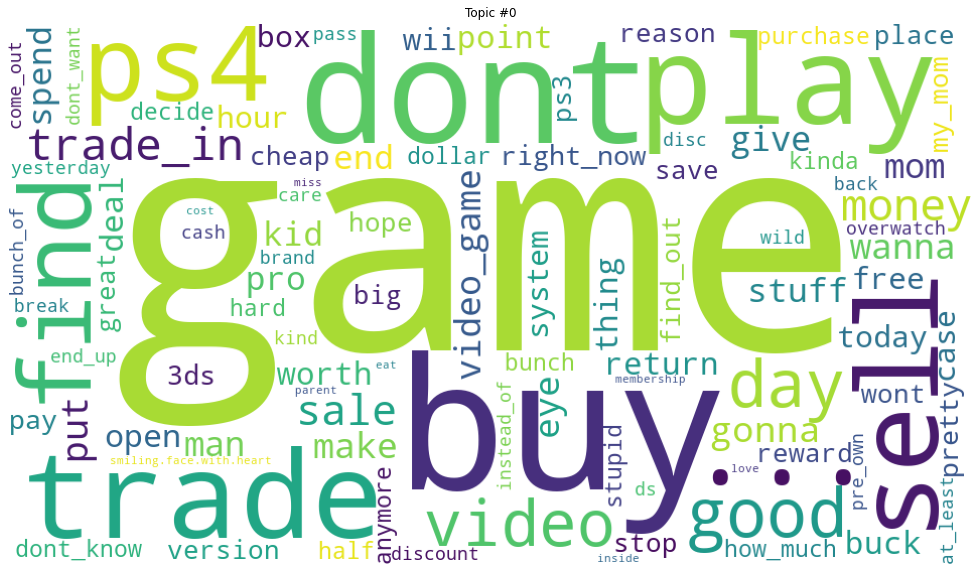

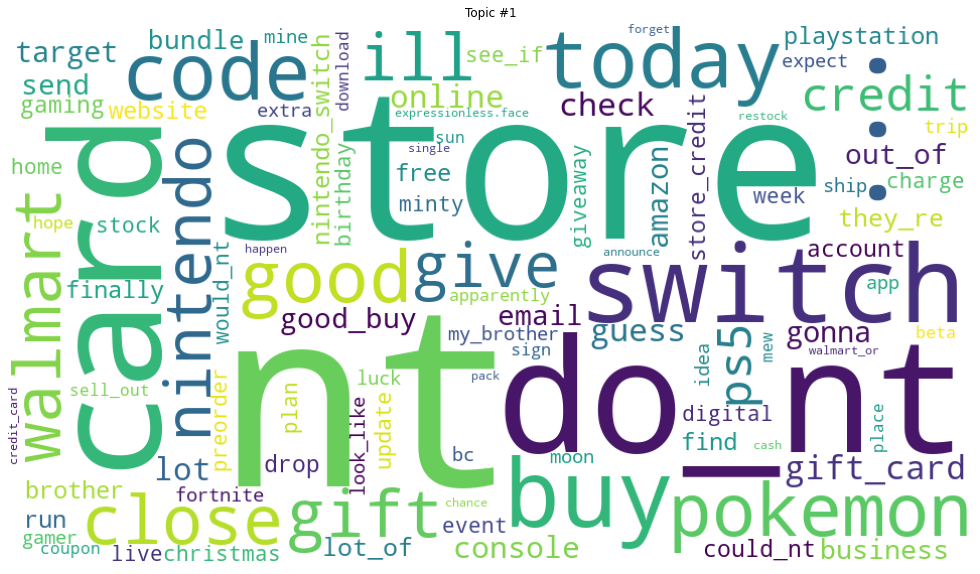

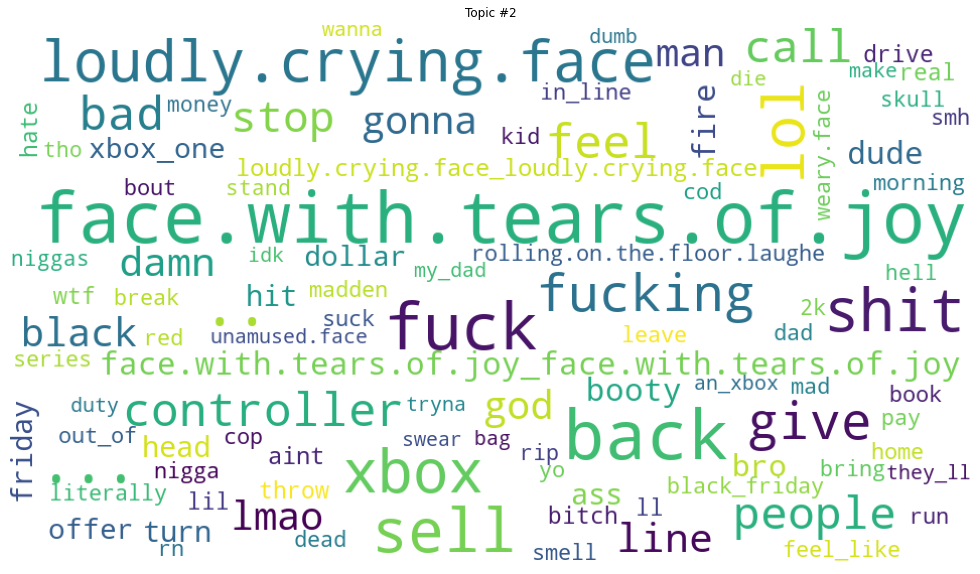

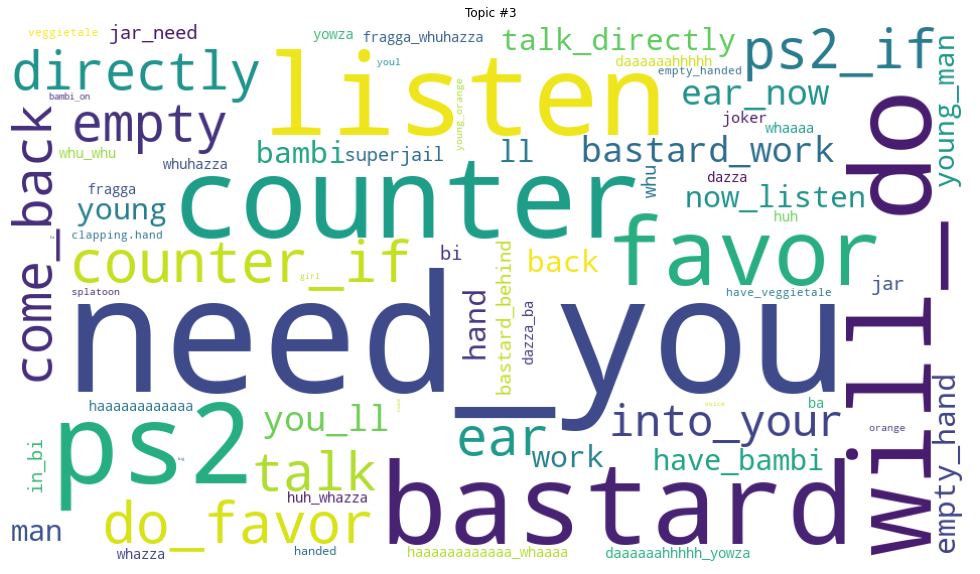

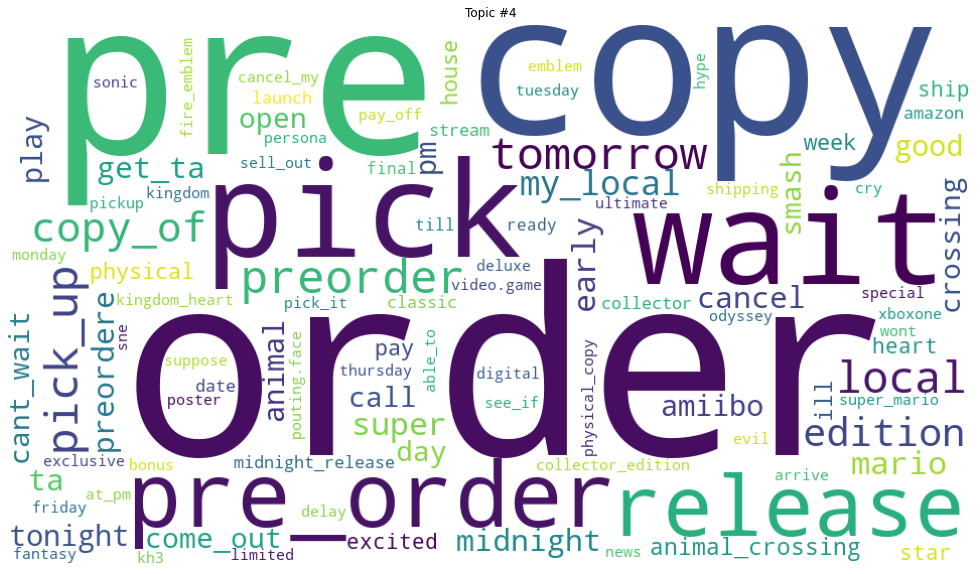

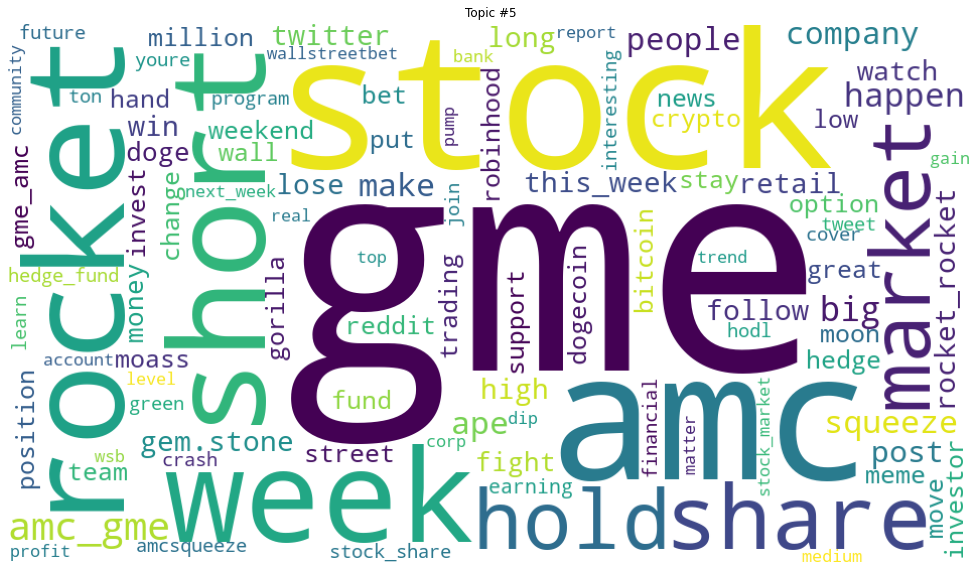

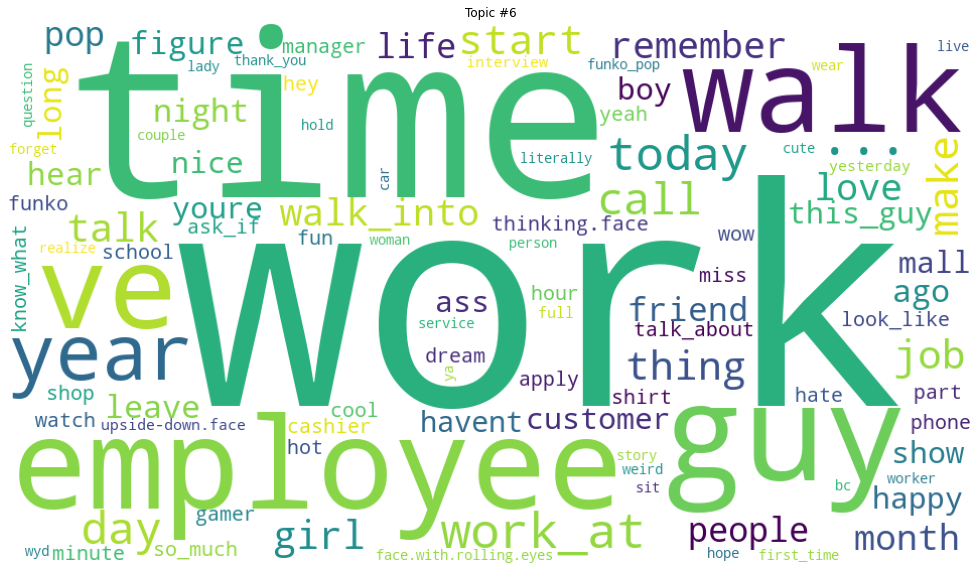

In [19]:
from datetime import datetime as dt
import os
mask = "D-%y%m%d-T-%H.%M.%S"
print("here")
dte = dt.now().strftime(mask)

results_folder = "results/" + params['Asset name'] + "/" + params['Asset name'] + dte
num_topics = params['num_topics']
os.makedirs(f"{results_folder}")
import pandas as pd

df = pd.read_csv(f'data/ryan_game_stop_data1.csv')
#df['text'] = df['text'].astype('|S')



#df = df[~df.text.str.contains(r'[0-9]')]

#reset index
df = df.reset_index(drop=True)

df = df[df['text'].notnull()]

def emoticons(text):
    words = text.split()
    reformed = [SMILEYS[word] if word in SMILEYS else word for word in words]
    text = " ".join(reformed)
    return text

df['text1'] = df['text'].map(emoticons)

def demojise(tweet):
    tweet = emoji.demojize(tweet)
    tweet = tweet.replace(":"," ")
    tweet = ' '.join(tweet.split())
    return tweet
df['text1'] = df['text'].map(demojise)

#program to clean tweets
import html

def clean(text):
    # convert html escapes like &amp; to characters.
    text = html.unescape(text)
    # tags like <tab>
    text = re.sub(r'<[^<>]*>', ' ', text)
    # markdown URLs like [Some text](https://....)
    text = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', text)
    # text or code in brackets like [0]
    text = re.sub(r'\[[^\[\]]*\]', ' ', text)
    # standalone sequences of specials, matches &# but not #cool
    text = re.sub(r'(?:^|\s)[&#<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', text)
    # standalone sequences of hyphens like --- or ==
    text = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', text)
    # sequences of white spaces
    text = re.sub(r'\s+', ' ', text)
    #no hashtags
    #text = re.sub('\#[\w\_]+',' ', text)
    #no dollar
    text = re.sub('\$[\w\_]+',' ', text)
    text = text.replace("`","")
    text = text.replace("´","")
    text = text.replace("’","")
    text = text.replace("'","")
    #for bigrams and trigrams to work, need to replace _ with something else
    text = text.replace("_",".")
    return text.strip()

#apply clean
df['text1'] = df['text1'].map(clean)

from  textacy import preprocessing as tprep
def normalise(text):
    text = tprep.normalize.hyphenated_words(text)
    text = tprep.normalize.quotation_marks(text)
    text = tprep.normalize.unicode(text)
    text = tprep.remove.accents(text)
    return text

df['text1'] = df['text1'].map(normalise)


#convert to lowercase
df = df.applymap(lambda s:s.lower() if type(s) == str else s) #convert all to lowercase

print("here")

#remove tweets that aren't useful
df = df[~df.text1.str.contains('Current price:')]
df = df[~df.text1.str.contains('Current price')]
df = df[~df.text1.str.contains('current price')]
df = df[~df.text1.str.contains('current rate:')]
df = df[~df.text1.str.contains('Current rate:')]
df = df[~df.text1.str.contains('volume alert')]
df = df[~df.text1.str.contains('price update')]
df = df[~df.text1.str.contains('prices update')]
df = df[~df.text1.str.contains('price action')]
df = df[~df.text1.str.contains('price action')]
df = df[~df.text1.str.contains('price increase')]
df = df[~df.text1.str.contains('price decrease')]
df = df[~df.text1.str.contains('density')]
#df = df[~df.text1.str.contains('volume')]
df = df[~df.text1.str.contains('last hour')]
df = df[~df.text1.str.contains('latest block info')]
df = df[~df.text1.str.contains('closed sell')]
df = df[~df.text1.str.contains('alert')]
df = df[~df.text1.str.contains('hourly update')]
df = df[~df.text1.str.contains('%')]


searchfor = ['current', 'price']
df = df[~df.text1.str.contains('|'.join(searchfor))]



df = df.reset_index(drop=True)

#keep tweets that are of interest for that asset
#df_btc = df[df.text1.str.contains(params['Asset tags'], na=False)]
df_btc = df 
df_btc = df_btc.reset_index(drop=True)

#delete words i don't think are useful to the analysis
import re
To_remove_lst = params['Remove list']
p = re.compile('|'.join(map(re.escape, To_remove_lst)))
df_btc['text1'] = [p.sub('', text) for text in df_btc['text1']] 

#get rid of tweets that have 10 or more numbers, these are tweets that just report value
def count_digits(string):
    return sum(item.isdigit() for item in string)


df_btc['count_num'] = df_btc['text'].apply(count_digits)
df_btc = df_btc[['date','text', 'text1', 'count_num']].loc[df_btc['count_num'] < 10] # so take it to be >= get rid 
df_btc = df_btc.reset_index(drop=True)


#sample down for speed
df = df_btc.sample(frac=0.2, replace=False)
df.to_csv(f'{results_folder}/00 - Initial sample DF.csv')
#df=df_btc
df = df.reset_index(drop=True)
nlp.tokenizer.rules = {key: value for key, value in nlp.tokenizer.rules.items() if "'" not in key and "’" not in key and "‘" not in key}



test = nlp.tokenizer.rules
#del test['gonna'][0][65]
#del test['gonna'][1][65]
#del test['Gonna'][0][65]
#del test['Gonna'][1][65]



del test["gonna"]
del test["dont"]
del test["cant"]
del test["havent"]
del test["shouldnt"]
del test["aint"]
del test["wont"]
del test["youre"]

nlp.tokenizer.rules = test

#delete stopwords
df['text2'] = df['text1'].map(nlp)
#KEEP STOP WORDS ACCORDING TO STUDY IT'S BETTER FOR STOP WORDS AND I THINK IT'S BETTER FOR SENTIMENT ANALYSIS
# def stop_words(doc):
#     non_stop = [t for t in doc if not t.is_stop and not t.is_punct]
#     return non_stop
# df['text3'] = df['text2'].map(stop_words)
df['text3'] = df['text2']

#my own lemmatisation because looks like the one below doesnt work
def lemma(doc):
    doclems = [t.lemma_ for t in doc]
    return doclems
df['text4'] = df['text3'].map(lemma)
#df['text4'] = df['text3']
%pylab inline
print("here")
import pandas as pd
import pickle as pk
from scipy import sparse as sp

#converting to a string
df['text5'] = [' '.join(map(str, l)) for l in df['text4']]

cleandf = df[['text5']]
cleandf.to_csv(f'{results_folder}/00 - Cleaned Text.csv')
print("exported clean data")

docs = array(df['text5'])


#more preprocessing of the docs
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import TweetTokenizer

def docs_preprocessor(docs):
    tokenizer = TweetTokenizer()
    for idx in range(len(docs)):
        docs[idx] = docs[idx].lower()  # Convert to lowercase.
        docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

    # Remove numbers, but not words that contain numbers.
    docs = [[token for token in doc if not token.isdigit()] for doc in docs]
    
    # Remove words that are only one character.
    docs = [[token for token in doc if len(token) > 1] for doc in docs]
    
    # Lemmatize all words in documents.
    #lemmatizer = WordNetLemmatizer()
    #docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]
  
    return docs
docs = docs_preprocessor(docs)

from gensim.models import Phrases
# Add bigrams and trigrams to docs (only ones that appear 10 times or more).
bigram = Phrases(docs, min_count=30)
trigram = Phrases(bigram[docs])

for idx in range(len(docs)):
    for token in trigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

            
from gensim.corpora import Dictionary
print("here")
# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)

print('Number of unique words in initital documents:', len(dictionary))

# Filter out words that occur less than 10 documents, or more than 3% of the documents. The original here was 20% 

dictionary.filter_extremes(no_below=5, no_above=0.8)
dictionary.save_as_text(f'{results_folder}/dict_text.txt') 

print('Number of unique words after removing rare and common words:', len(dictionary))


temp = dictionary[0]
id2word = dictionary.id2token

#-----------------------------------------------------------------------------------------------------------------------------------------------


corpus = [dictionary.doc2bow(doc) for doc in docs]


from gensim.models import LdaModel
import os
from gensim.models.coherencemodel import CoherenceModel




# from gensim.models.ldamulticore import LdaMulticore
# lda_para_model_n = []
# for n in range(3, 30):
#     lda_model_c = LdaMulticore(corpus=corpus, id2word=id2word, chunksize=2000, eta='auto', iterations=400, num_topics=n, passes=20, eval_every=None,random_state=42)
#     lda_coherence = CoherenceModel(model=lda_model_c, texts=docs,dictionary=dictionary, coherence='c_v')
#     lda_para_model_n.append((n, lda_model_c, lda_coherence.get_coherence()))
# fig = pd.DataFrame(lda_para_model_n, columns=["n", "model","coherence"]).set_index("n")[["coherence"]].plot(figsize=(16,9))
# bestco_df= pd.DataFrame(lda_para_model_n, columns=["n", "model","coherence"]).set_index("n")[["coherence"]]
# bestco_df.to_csv(f'{results_folder}/00a - Best Coherence.csv')
# fig = pd.DataFrame(lda_para_model_n, columns=["n", "model","coherence"]).set_index("n")[["coherence"]].plot(figsize=(16,9))
# plt.title('Coherence Score (CV) across the number of topics chosen in each model', fontsize=20)
# plt.xlabel('Number of topics', fontsize=20)
# plt.ylabel('Coherence score', fontsize=20)
# plt.tick_params(axis='x', labelsize=16)
# plt.tick_params(axis='y', labelsize=16)
# fig.figure.savefig(f'{results_folder}/Best_coherence_cv.png')
# bestop = bestco_df.idxmax()[0]
# num_topics = bestop



# from gensim.models.ldamulticore import LdaMulticore
# lda_para_model_n = []
# for n in range(3, 30):
#     lda_model_c = LdaMulticore(corpus=corpus, id2word=id2word, chunksize=2000, eta='auto', iterations=400, num_topics=n, passes=20, eval_every=None,random_state=42)
#     lda_coherence = CoherenceModel(model=lda_model_c, texts=docs,dictionary=dictionary, coherence='u_mass')
#     lda_para_model_n.append((n, lda_model_c, lda_coherence.get_coherence()))
# fig = pd.DataFrame(lda_para_model_n, columns=["n", "model","coherence"]).set_index("n")[["coherence"]].plot(figsize=(16,9))
# bestco_df= pd.DataFrame(lda_para_model_n, columns=["n", "model","coherence"]).set_index("n")[["coherence"]]
# bestco_df.to_csv(f'{results_folder}/00a - Best Coherence.csv')
# fig = pd.DataFrame(lda_para_model_n, columns=["n", "model","coherence"]).set_index("n")[["coherence"]].plot(figsize=(16,9))
# plt.title('Coherence Score (CV) across the number of topics chosen in each model', fontsize=20)
# plt.xlabel('Number of topics', fontsize=20)
# plt.ylabel('Coherence score', fontsize=20)
# plt.tick_params(axis='x', labelsize=16)
# plt.tick_params(axis='y', labelsize=16)
# fig.figure.savefig(f'{results_folder}/Best_coherence_umass.png')
# bestop = bestco_df.idxmax()[0]







from gensim.models.wrappers import LdaMallet
os.environ.update({'MALLET_HOME':r'C:/new_mallet/mallet-2.0.8'}) 
#You should update this path as per the path of Mallet directory on your system.
mallet_path = r'C:\\new_mallet\\mallet-2.0.8\\bin\\mallet' 
#You should update this path as per the path of Mallet directory on your system.

temp = dictionary[0]  # This is only to "load" the dictionary.


ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, optimize_interval=50)
import pprint
print(ldamallet.show_topics(formatted=False))


model2 = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(ldamallet)
from gensim.models.coherencemodel import CoherenceModel

lda_gensim_para_coherence = CoherenceModel(model=model2,
    texts=docs, dictionary=dictionary, coherence='c_v')
lda_gensim_para_coherence_score = lda_gensim_para_coherence.get_coherence()




print(lda_gensim_para_coherence_score)

#pyLDAvis.gensim_models.prepare(model2, corpus, dictionary)

print("here")
data = df.text.values.tolist()
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    originalcont = pd.Series(df['text'])
    sent_topics_df = pd.concat([sent_topics_df, contents, originalcont], axis=1)
    return(sent_topics_df)



df_topic_sents_keywords = format_topics_sentences(ldamodel=model2, corpus=corpus, texts=docs)
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text', 'Original Text']

#save this
df_dominant_topic.head(10)
df_dominant_topic.to_csv(f'{results_folder}/01 - First ten documents.csv', index=True)

# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text", "Original Text"]

# Show and save
sent_topics_sorteddf_mallet.head(20)
sent_topics_sorteddf_mallet.to_csv(f'{results_folder}/02 - Topic examples.csv', index=True)


#word clouds
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(#stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = model2.show_topics(formatted=False)

for t in range(model2.num_topics):
    plt.figure(figsize=(20,10))
    plt.imshow(WordCloud(background_color="white", max_words=100, width=960,height=540).fit_words(dict(model2.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.savefig(f'{results_folder}/03 - Topic_{t}.png')
    #plt.show()
    




#save stuff
import pickle

#pickle.dump(corpus, open('btc_corpus.pkl', 'wb'))
#dictionary.save('btc_dict.gensim')
#pickle.dump(model2, open('btc_model.pkl', 'wb'))
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

a = pyLDAvis.gensim_models.prepare(model2, corpus, dictionary, sort_topics=False)
pyLDAvis.save_html(a, f'{results_folder}/04 - btc_pyLDAvis.html')


from sklearn.metrics.pairwise import cosine_similarity
model=model2
df['tokenz'] = docs

docs1 = df['tokenz'].apply(lambda l: l[:int0(len(l)/2)])
docs2 = df['tokenz'].apply(lambda l: l[int0(len(l)/2):])

corpus1 = [dictionary.doc2bow(doc) for doc in docs1]
corpus2 = [dictionary.doc2bow(doc) for doc in docs2]

# Using the corpus LDA model tranformation
lda_corpus1 = model[corpus1]
lda_corpus2 = model[corpus2]

from collections import OrderedDict
def get_doc_topic_dist(model, corpus, kwords=False):
    
    '''
    LDA transformation, for each doc only returns topics with non-zero weight
    This function makes a matrix transformation of docs in the topic space.
    '''
    top_dist =[]
    keys = []

    for d in corpus:
        tmp = {i:0 for i in range(num_topics)}
        tmp.update(dict(model[d]))
        vals = list(OrderedDict(tmp).values())
        top_dist += [array(vals)]
        if kwords:
            keys += [array(vals).argmax()]

    return array(top_dist), keys

top_dist1, _ = get_doc_topic_dist(model, lda_corpus1)
top_dist2, _ = get_doc_topic_dist(model, lda_corpus2)

print("Intra similarity: cosine similarity for corresponding parts of a doc(higher is better):")
print(mean([cosine_similarity(c1.reshape(1, -1), c2.reshape(1, -1))[0][0] for c1,c2 in zip(top_dist1, top_dist2)]))

random_pairs = np.random.randint(0, len(df['text']), size=(400, 2))

print("Inter similarity: cosine similarity between random parts (lower is better):")
print(np.mean([cosine_similarity(top_dist1[i[0]].reshape(1, -1), top_dist2[i[1]].reshape(1, -1)) for i in random_pairs]))


def explore_topic(lda_model, topic_number, topn, output=True):
    """
    accept a ldamodel, atopic number and topn vocabs of interest
    prints a formatted list of the topn terms
    """
    terms = []
    for term, frequency in lda_model.show_topic(topic_number, topn=topn):
        terms += [term]
        if output:
            print(u'{:20} {:.3f}'.format(term, round(frequency, 3)))
    
    return terms
print("here")
# topic_summaries = []
# print(u'{:20} {}'.format(u'term', u'frequency') + u'\n')
# for i in range(num_topics):
#     print('Topic '+str(i)+' |---------------------\n')
#     tmp = explore_topic(model,topic_number=i, topn=10, output=True )
# #     print tmp[:5]
#     topic_summaries += [tmp[:5]]
#     print

##export the term and frequency of each topic 
df_tf = pd.DataFrame()
for i in range(num_topics):
    stats = model2.show_topic(i, 30)
    name_list = [x[0] for x in stats]
    imp_list = [x[1] for x in stats]
    dfint = pd.DataFrame(list(zip(name_list, imp_list)), columns =['Term', 'Frequency'])
    dfint['Topic'] = f'Topic {i}'
    df_tf = df_tf.append(dfint)

df_tf.to_csv(f'{results_folder}/05 - Topic word frequencies.csv', index=True)    
    
    
    
top_labels = {0: 'Topic Zero', 1:'Topic One', 2:'Topic Two', 3:'Topic Three', 4:'Topic Four', 5:'Topic Five', 6:'Topic Six', 7:'Topic Seven', 8: 'Topic Eight', 9:'Topic Nine', 10:'Topic Ten', 11:'Topic Eleven',12:'Topic Twelve',
             13:'Topic Thirteen', 14:'Topic Fourteen', 15:'Topic Fifteen', 16:'Topic Sixteen', 17:'Topic Seventeen', 18:'Topic Eighteen'}

import re
import nltk

from nltk.corpus import stopwords

stops = set(stopwords.words('english'))

def paper_to_wordlist( paper, remove_stopwords=True ):
    '''
        Function converts text to a sequence of words,
        Returns a list of words.
    '''
    lemmatizer = WordNetLemmatizer()
    # 1. Remove non-letters
    paper_text = re.sub("[^a-zA-Z]"," ", paper)
    # 2. Convert words to lower case and split them
    words = paper_text.lower().split()
    # 3. Remove stop words
    words = [w for w in words if not w in stops]
    # 4. Remove short words
    words = [t for t in words if len(t) > 2]
    # 5. lemmatizing
    words = [nltk.stem.WordNetLemmatizer().lemmatize(t) for t in words]

    return(words)

from sklearn.feature_extraction.text import TfidfVectorizer

# tvectorizer = TfidfVectorizer(input='content', analyzer = 'word', lowercase=True, stop_words='english',\
#                                   tokenizer=paper_to_wordlist, ngram_range=(1, 3), min_df=40, max_df=0.20,\
#                                   norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=True)

#dtm = tvectorizer.fit_transform(df['text']).toarray()


top_dist =[]
for d in corpus:
    tmp = {i:0 for i in range(num_topics)}
    tmp.update(dict(model[d]))
    vals = list(OrderedDict(tmp).values())
    top_dist += [array(vals)]
    
top_dist, lda_keys= get_doc_topic_dist(model, corpus, True)
#features = tvectorizer.get_feature_names()    
print("after dtm step")
#top_ws = []
# for n in range(len(dtm)):
#     inds = int0(argsort(dtm[n])[::-1][:4])
#     tmp = [features[i] for i in inds]
    
#     top_ws += [' '.join(tmp)]
    
#df['Text_Rep'] = pd.DataFrame(top_ws)
df['clusters'] = pd.DataFrame(lda_keys)
df['clusters'].fillna(10, inplace=True)

cluster_colors = {0: 'blue', 1: 'green', 2: 'yellow', 3: 'red', 4: 'skyblue', 5:'salmon', 6:'orange', 7:'maroon', 8:'crimson', 9:'gainsboro', 10:'darkorchid', 
                 11: 'cyan', 12: 'darkseagreen', 13: 'gold', 14: 'deeppink', 15: 'slategray', 16:'bisque', 17:'peru', 18:'linen', 19:'rosybrown', 20:'indigo', 21:'gray'}

df['colors'] = df['clusters'].apply(lambda l: cluster_colors[l])

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_iter = 3500, perplexity = 40)
X_tsne = tsne.fit_transform(top_dist)

df['X_tsne'] =X_tsne[:, 0]
df['Y_tsne'] =X_tsne[:, 1]

from bokeh.plotting import figure, show, output_notebook, save, output_file
from bokeh.models import HoverTool, value, LabelSet, Legend, ColumnDataSource
output_notebook()


source = ColumnDataSource(dict(
    x=df['X_tsne'],
    y=df['Y_tsne'],
    color=df['colors'],
    label=df['clusters'].apply(lambda l: top_labels[l]),
#     msize= p_df['marker_size'],
    topic_key= df['clusters'],
    #title= df[u'Title'],
    content = df['text']
))


    
title = 'T-SNE visualization of topics'

plot_lda = figure(plot_width=1000, plot_height=600,
                     title=title, tools="pan,wheel_zoom,box_zoom,reset,hover", x_axis_type=None, y_axis_type=None, min_border=1)

plot_lda.scatter(x='x', y='y', legend='label', source=source,
                 color='color', alpha=0.8, size=10)#'msize', )

# hover tools
hover = plot_lda.select(dict(type=HoverTool))
hover.tooltips = {"content": "@content - Topic: @topic_key "}
plot_lda.legend.location = "top_left"

from bokeh.models import Model
from bokeh.io import curdoc

curdoc().clear()
for model in plot_lda.select({'type': Model}):
    prev_doc = model.document
    model._document = None
    if prev_doc:
        prev_doc.remove_root(model)
        

#save the plot
save(plot_lda, f'{results_folder}/06 - Tsnse.html'.format(title))

#show(plot_lda)
#pyLDAvis.save_html(a, f'results/btc/04 - btc_pyLDAvis.html')



# try:
#     reset_output()
#     output_notebook()
#     show(plot_lda)
# except:
#     output_notebook()
#     show(plot_lda)

from bokeh.models import Model
from bokeh.io import curdoc

curdoc().clear()
for model in plot_lda.select({'type': Model}):
    prev_doc = model.document
    model._document = None
    if prev_doc:
        prev_doc.remove_root(model)
        
show(plot_lda)



In [35]:
from gensim.models.coherencemodel import CoherenceModel




from gensim.models.ldamulticore import LdaMulticore
lda_para_model_n = []
for n in range(3, 30):
    lda_model_c = LdaMulticore(corpus=corpus, id2word=id2word, chunksize=2000, eta='auto', iterations=400, num_topics=n, passes=20, eval_every=None,random_state=42)
    lda_coherence = CoherenceModel(model=lda_model_c, texts=docs,dictionary=dictionary, coherence='c_v')
    lda_para_model_n.append((n, lda_model_c, lda_coherence.get_coherence()))
fig = pd.DataFrame(lda_para_model_n, columns=["n", "model","coherence"]).set_index("n")[["coherence"]].plot(figsize=(16,9))
bestco_df= pd.DataFrame(lda_para_model_n, columns=["n", "model","coherence"]).set_index("n")[["coherence"]]
bestco_df.to_csv(f'{results_folder}/00a - Best Coherence.csv')
fig = pd.DataFrame(lda_para_model_n, columns=["n", "model","coherence"]).set_index("n")[["coherence"]].plot(figsize=(16,9))
plt.title('Coherence Score (CV) across the number of topics chosen in each model', fontsize=20)
plt.xlabel('Number of topics', fontsize=20)
plt.ylabel('Coherence score', fontsize=20)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
fig.figure.savefig(f'{results_folder}/Best_coherence_cv.png')
bestop = bestco_df.idxmax()[0]




from gensim.models.ldamulticore import LdaMulticore
lda_para_model_n = []
for n in range(3, 30):
    lda_model_c = LdaMulticore(corpus=corpus, id2word=id2word, chunksize=2000, eta='auto', iterations=400, num_topics=n, passes=20, eval_every=None,random_state=42)
    lda_coherence = CoherenceModel(model=lda_model_c, texts=docs,dictionary=dictionary, coherence='u_mass')
    lda_para_model_n.append((n, lda_model_c, lda_coherence.get_coherence()))
fig = pd.DataFrame(lda_para_model_n, columns=["n", "model","coherence"]).set_index("n")[["coherence"]].plot(figsize=(16,9))
bestco_df= pd.DataFrame(lda_para_model_n, columns=["n", "model","coherence"]).set_index("n")[["coherence"]]
bestco_df.to_csv(f'{results_folder}/00a - Best Coherence.csv')
fig = pd.DataFrame(lda_para_model_n, columns=["n", "model","coherence"]).set_index("n")[["coherence"]].plot(figsize=(16,9))
plt.title('Coherence Score (CV) across the number of topics chosen in each model', fontsize=20)
plt.xlabel('Number of topics', fontsize=20)
plt.ylabel('Coherence score', fontsize=20)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
fig.figure.savefig(f'{results_folder}/Best_coherence_umass.png')
#bestop = bestco_df.idxmax()[0]


KeyboardInterrupt: 

In [5]:
df.to_csv(f'{results_folder}/06a - Final DF.csv')

In [36]:

df['date1'] = pd.DatetimeIndex(df['date'])
df['month_year'] = df['date1'].dt.to_period( freq = 'Q')
df['year'] = pd.DatetimeIndex(df['date']).year
df_ts = df.groupby(['month_year','clusters'], as_index=True).count()
df_ts1 = df_ts[['date']]
df_ts2 = df_ts1.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
df_ts3 = df_ts2.pivot_table(index=["month_year"], 
                    columns='clusters', 
                    values='date')
#columns = ["app ride", "moto mirror", "button bit", "battery work", "bike break", "time case", "helmet scooter"]
# df_ts3.columns = columns
#df_ts3.index= pd.to_datetime(df_ts3.index,format='%Y')
sev = df_ts3.plot.area(figsize=(16,10), use_index=True,x_compat=True, colormap="tab20")


plt.title('Proportion of Topics Through Time', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('%', fontsize=20)
legend = plt.legend(title="Topics")
sev.figure.savefig(f'{results_folder}/07 - Topics over time.png')



C:\Users\T430\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


KeyError: 'clusters'

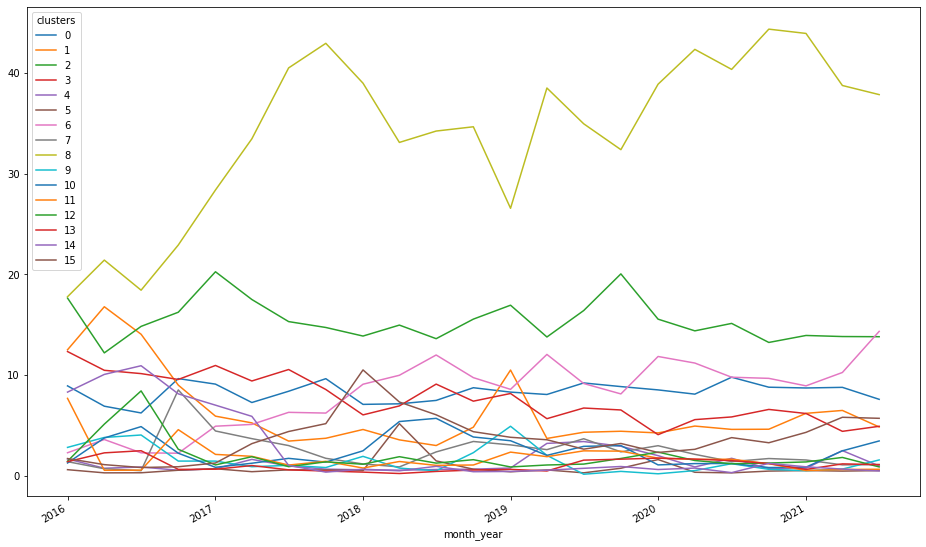

In [8]:
seva = df_ts3.plot(figsize=(16,10), use_index=True,x_compat=True)
seva.figure.savefig(f'{results_folder}/07a - Topics over time.png')

# Build co occurence matrix for analysis

In [29]:
df['text1'][df.text.str.contains('dont')]

10       the game is changing. everything is coming down into place. most of the money will be held by 3 ...
24       friend hows your #alts doing? me i dont know? is up? expressionless_face #truthhurts # #lun #trx...
110                      #eos will be the first to surpass in marketcap for a short period of time. #dont@me
285      bullseye 2| and i got india showing up for the 1st time. like i wants to get my uk numbers back ...
907      just got an email saying that this guy got a video of my porn and if i dont give him 700 dollars...
                                                        ...                                                 
15001    so as mentioned; be prepared for that explosion. im not sure how theyre going to play it out. i ...
15227    if the giveaway dont get 50 like or retweet by tommorw im gona change it to or free datdrop battles
15297    my stock just made me .00 who wants to hit up the dollar menu with me cause im ricchhh jkjk. mcd...
15324    buy signal

In [30]:
# sklearn countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
# Convert a collection of text documents to a matrix of token counts
cv = CountVectorizer(ngram_range=(1,2), stop_words = 'english', strip_accents='unicode', max_df = 0.95, min_df = 0.01, max_features = 30)
# matrix of token counts
X = cv.fit_transform(df['text1'])
Xc = (X.T * X) # matrix manipulation
Xc.setdiag(0) # set the diagonals to be zeroes as it's pointless to be 1

In [31]:
import pandas as pd
names = cv.get_feature_names() # This are the entity names (i.e. keywords)
df10 = pd.DataFrame(data = Xc.toarray(), columns = names, index = names)
df10.to_csv(f'{results_folder}/to gephi.csv', sep = ',')

In [8]:
df10

alts  blockchain  buy  currency  day  don  eth  ethereum  going  \
alts           0          29   59        90    8   32   70        32     34   
blockchain    29           0   23       222   14   20  131       199     19   
buy           59          23    0        51   30   80   42        39     71   
currency      90         222   51         0   30   51  123       234     39   
day            8          14   30        30    0   26   19        22      9   
don           32          20   80        51   26    0   35        26     38   
eth           70         131   42       123   19   35    0       143     49   
ethereum      32         199   39       234   22   26  143         0     33   
going         34          19   71        39    9   38   49        33      0   
good          30          44   20        46   13   17   36        33     16   
just          43          37  100        63   41  105   65        37     64   
know          14          15   32        20   15  108   19        15     27   
like          50          41   51        77   27  137   59        49     57   
long          21           8   11        26   16   25   19         7     15   
make          22          24   32        33    9   44   23        18     24   
market        34          30   44        53   18   22   39        33     38   
money         32          36  103       114   18   73   45        52     44   
need          18          16   36        20    7   64    9        10     15   
new           24          39   78        63   29   26   25        25     18   
people        31          29   56        77   26   80   28        27     56   
right         25          12   49        11   14   18   14        14     22   
rocket        28          10   26        37   10   25   35        28     38   
think         26          20   38        37   10   59   36        15     46   
time          41          28   95        69   34   47   45        42     38   
today         12          12   27        51   29   14   27        10     29   
trading       32          58   18        92   23   26   53        43     10   
value         10          22   25        31    9   15   12        12      8   
want          19           8   53        14    9   73   13        20      7   
world          5          38   26        65   16   32   30        18     20   
xrp           21          27   21        66   16   21  131        53     25   

            good  ...  right  rocket  think  time  today  trading  value  \
alts          30  ...     25      28     26    41     12       32     10   
blockchain    44  ...     12      10     20    28     12       58     22   
buy           20  ...     49      26     38    95     27       18     25   
currency      46  ...     11      37     37    69     51       92     31   
day           13  ...     14      10     10    34     29       23      9   
don           17  ...     18      25     59    47     14       26     15   
eth           36  ...     14      35     36    45     27       53     12   
ethereum      33  ...     14      28     15    42     10       43     12   
going         16  ...     22      38     46    38     29       10      8   
good           0  ...     24      23     25    38     23       28     14   
just          42  ...     48      25     64    85     31       26     31   
know          15  ...     14       8     26    38     17       15     11   
like          29  ...     37      30     40    65     30       24     30   
long          14  ...      9       7     18    36     20       25     10   
make          12  ...      8      12     19    25     13       17     10   
market        21  ...     16      16     36    47     28       41     68   
money         40  ...     20      22     37    83     58       50     43   
need          19  ...     10       2     17    16      4       19     14   
new            9  ...      7      11     17    39     13       15     14   
people        19  ...     16      16     5

In [27]:
def clean(text):
    # convert html escapes like &amp; to characters.
    text = html.unescape(text)
    # tags like <tab>
    text = re.sub(r'<[^<>]*>', ' ', text)
    # markdown URLs like [Some text](https://....)
    text = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', text)
    # text or code in brackets like [0]
    text = re.sub(r'\[[^\[\]]*\]', ' ', text)
    # standalone sequences of specials, matches &# but not #cool
    text = re.sub(r'(?:^|\s)[&#<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', text)
    # standalone sequences of hyphens like --- or ==
    text = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', text)
    # sequences of white spaces
    text = re.sub(r'\s+', ' ', text)
    #no hashtags
    #text = re.sub('\#[\w\_]+',' ', text)
    #no dollar
    text = re.sub('\$[\w\_]+',' ', text)
    text = text.replace("'", "")
    return text.strip()

#apply clean
df['text1'] = df['text1'].map(clean)

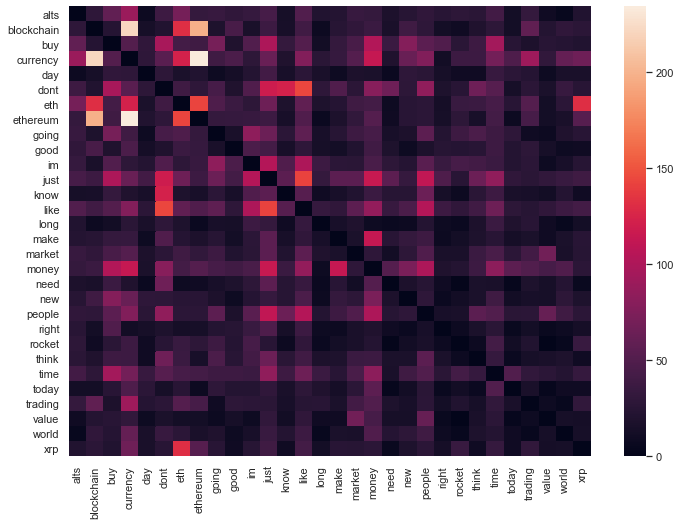

In [32]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.heatmap(df10)

# output topics and terms

In [299]:
df_tf

Term  Frequency     Topic
0    people   0.024215   Topic 0
1     money   0.015468   Topic 0
2     thing   0.008953   Topic 0
3      time   0.008736   Topic 0
4       buy   0.008622   Topic 0
..      ...        ...       ...
25      app   0.004636  Topic 17
26     bank   0.004636  Topic 17
27   follow   0.004382  Topic 17
28    check   0.004306  Topic 17
29  twitter   0.004129  Topic 17

[540 rows x 3 columns]

In [300]:
df_tf2 = df_tf.groupby(['Topic'])['Term'].apply(lambda text: ''.join(text.to_string(index=False))).str.replace('(\\n)', ',').reset_index()

<ipython-input-300-a39af3926ecf>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_tf2 = df_tf.groupby(['Topic'])['Term'].apply(lambda text: ''.join(text.to_string(index=False))).str.replace('(\\n)', ',').reset_index()


In [301]:
df_tf2

Topic  \
0    Topic 0   
1    Topic 1   
2   Topic 10   
3   Topic 11   
4   Topic 12   
5   Topic 13   
6   Topic 14   
7   Topic 15   
8   Topic 16   
9   Topic 17   
10   Topic 2   
11   Topic 3   
12   Topic 4   
13   Topic 5   
14   Topic 6   
15   Topic 7   
16   Topic 8   
17   Topic 9   

                                                                                                   Term  
0       people,     money,     thing,      time,       buy,      talk,      good,      shit,    inve...  
1                 look_like,               currency,                    xrp,                    eth,...  
2                         win_play,                          game,                          play,   ...  
3              bank,    play_expert,   central_bank,         system,          money,       currency,...  
4                    doge,            doge_doge,                 scam,          daily_close,        ...  
5        buy,     alt,    time,     day,    sell,    year,    good,  market,   today,    week,    pu...  
6           number_google,                np_rt,            pump_dump,             eeuu_usa,        ...  
7                rate_sit,                  fee,                block,                 rate,        ...  
8        store_value,      marine_mtc,     transaction,   digital_asset,        exchange,      proof...  
9                wallet,                pay,               send,             accept,               f...  
10              long,           short,       long_term,            term,      short_term,satoshi_nak...  
11                   usd_market,               1h_timeframe,                 trade_idea,           r...  
12                   time_high,                      high,                      time,             ex...  
13            gold,         money,         stock,        market,      currency,           buy,  stoc...  
14          volume_advance,                volume,               advance,         follow_profit,    ...  
15                    gon_na,                      na,                     gon,                curre...  
16             blockchain,             currency,             ethereum,              project,        ...  
17                  bear_market,                bull_market,                     get_ta,            ...

In [302]:
df_tf2.to_csv(f'{results_folder}/08 - Topics.csv')

# get alpha

In [303]:
model2.alpha

array([0.44228789, 0.07556672, 0.08963518, 0.01258657, 0.01730306,
       0.09082336, 0.0172242 , 0.02524561, 0.14521428, 0.01810905,
       0.0314266 , 0.1109949 , 0.01643892, 0.48027276, 0.00505746,
       0.0120775 , 0.03205125, 0.1709487 ])

# Var stuff

In [34]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import VAR
from scipy.stats import pearsonr

In [35]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [36]:
btc_price_df = pd.read_csv('data/BTC_USD_2013-10-01_2021-08-18-CoinDesk.csv', parse_dates=[1],  squeeze=True, date_parser=parser, index_col=1)

In [37]:
btc_price_df['BTC Price'] = btc_price_df['Closing Price (USD)']
btc_price_df['Date'] = btc_price_df.index
btc_price_df['Date1'] = pd.to_datetime(btc_price_df['Date']).dt.date
btc_price_df


Currency  Closing Price (USD)  24h Open (USD)  24h High (USD)  \
Date                                                                       
2013-10-01      BTC           123.654990      124.304660      124.751660   
2013-10-02      BTC           125.455000      123.654990      125.758500   
2013-10-03      BTC           108.584830      125.455000      125.665660   
2013-10-04      BTC           118.674660      108.584830      118.675000   
2013-10-05      BTC           121.338660      118.674660      121.936330   
...             ...                  ...             ...             ...   
2021-08-14      BTC         47654.729022    44433.880228    47861.031980   
2021-08-15      BTC         47004.357461    47810.373711    48126.473768   
2021-08-16      BTC         47144.842567    47099.469780    47370.906853   
2021-08-17      BTC         46181.730824    47004.047648    48048.744781   
2021-08-18      BTC         44887.242787    45930.416150    47137.389263   

            24h Low (USD)     BTC Price       Date       Date1  
Date                                                            
2013-10-01     122.563490    123.654990 2013-10-01  2013-10-01  
2013-10-02     123.633830    125.455000 2013-10-02  2013-10-02  
2013-10-03      83.328330    108.584830 2013-10-03  2013-10-03  
2013-10-04     107.058160    118.674660 2013-10-04  2013-10-04  
2013-10-05     118.005660    121.338660 2013-10-05  2013-10-05  
...                   ...           ...        ...         ...  
2021-08-14   44264.697085  47654.729022 2021-08-14  2021-08-14  
2021-08-15   46063.802197  47004.357461 2021-08-15  2021-08-15  
2021-08-16   45619.599550  47144.842567 2021-08-16  2021-08-16  
2021-08-17   45694.801774  46181.730824 2021-08-17  2021-08-17  
2021-08-18   44460.220565  44887.242787 2021-08-18  2021-08-18  

[2864 rows x 8 columns]

In [38]:
btc_price_df2 = btc_price_df.asfreq(pd.infer_freq(btc_price_df.index))
btc_price_df2

Currency  Closing Price (USD)  24h Open (USD)  24h High (USD)  \
Date                                                                       
2013-10-01      BTC           123.654990      124.304660      124.751660   
2013-10-02      BTC           125.455000      123.654990      125.758500   
2013-10-03      BTC           108.584830      125.455000      125.665660   
2013-10-04      BTC           118.674660      108.584830      118.675000   
2013-10-05      BTC           121.338660      118.674660      121.936330   
...             ...                  ...             ...             ...   
2021-08-14      BTC         47654.729022    44433.880228    47861.031980   
2021-08-15      BTC         47004.357461    47810.373711    48126.473768   
2021-08-16      BTC         47144.842567    47099.469780    47370.906853   
2021-08-17      BTC         46181.730824    47004.047648    48048.744781   
2021-08-18      BTC         44887.242787    45930.416150    47137.389263   

            24h Low (USD)     BTC Price       Date       Date1  
Date                                                            
2013-10-01     122.563490    123.654990 2013-10-01  2013-10-01  
2013-10-02     123.633830    125.455000 2013-10-02  2013-10-02  
2013-10-03      83.328330    108.584830 2013-10-03  2013-10-03  
2013-10-04     107.058160    118.674660 2013-10-04  2013-10-04  
2013-10-05     118.005660    121.338660 2013-10-05  2013-10-05  
...                   ...           ...        ...         ...  
2021-08-14   44264.697085  47654.729022 2021-08-14  2021-08-14  
2021-08-15   46063.802197  47004.357461 2021-08-15  2021-08-15  
2021-08-16   45619.599550  47144.842567 2021-08-16  2021-08-16  
2021-08-17   45694.801774  46181.730824 2021-08-17  2021-08-17  
2021-08-18   44460.220565  44887.242787 2021-08-18  2021-08-18  

[2879 rows x 8 columns]

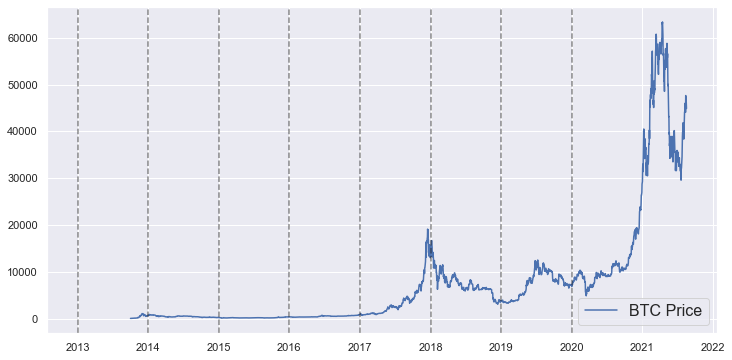

In [39]:
plt.figure(figsize=(12,6))
btc_price_df2, = plt.plot(btc_price_df2['BTC Price'])
#heater, = plt.plot(ice_cream_heater_df['heater'], color='red')

for year in range(2013, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)

plt.legend(['BTC Price'
            #, 'Heater'
           ], fontsize=16)


In [40]:
df['day_date'] = df['date1'].dt.to_period( freq = 'd')
df['date1'] = pd.to_datetime(df.date1).dt.tz_localize(None)
df['date2'] = df['date1'].dt.tz_localize(None)
df['date3'] = pd.to_datetime(df.date2)
df['date4'] = pd.to_datetime(df['date3']).dt.date
#get it by week


C:\Users\T430\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


# change to a proportion of the 300

In [41]:
# def getweek(date):
#     #get weekyear
#     date = date.isocalendar()[1]
#     return date

# def getyear(date):
#     #get weekyear
#     date = date.isocalendar()[0]
#     return date
# #apply clean
# df['week'] = df['date1'].map(getweek)
# df['year2'] = df['date1'].map(getyear)

In [42]:
#df

In [43]:
# df['week_yr'] = pd.to_datetime(df['year2'].astype(str) + ' ' + df['week'].astype(str) + ' 1',
#                                 format='%Y %U %w')

In [44]:
# df['week_year2'] = df['year2'].astype(str)+"_" +df['week'].astype(str)

In [45]:
#df

In [46]:
df = df.sort_values(by="date")

In [47]:
df.date.unique()

array(['2016-01-01 23:42:22+00:00', '2016-01-02 23:13:21+00:00',
       '2016-01-02 23:40:39+00:00', ..., '2021-08-23 23:57:46+00:00',
       '2021-08-23 23:58:12+00:00', '2021-08-23 23:58:16+00:00'],
      dtype=object)

In [48]:
df2 = df.loc[df["clusters"] == 7]
df2.value_counts(["date4", "clusters"])
dfts1 = df2.groupby(by=["date4"], as_index=False).size()

In [49]:
dfts1


date4  size
0     2016-01-07     1
1     2016-01-08     1
2     2016-01-10     1
3     2016-01-12     2
4     2016-01-13     1
...          ...   ...
1070  2021-08-19     1
1071  2021-08-20     2
1072  2021-08-21     2
1073  2021-08-22     2
1074  2021-08-23     1

[1075 rows x 2 columns]

In [97]:
#keep values only past 2016
btc_price_df
btc_price_df = btc_price_df[(btc_price_df['Date']> "2016-01-01")]

In [98]:
merged_left = pd.merge(left=dfts1[['date4', 'size']], right=btc_price_df[['BTC Price', 'Date1']], how='right', left_on = 'date4', right_on='Date1')

In [99]:
merged_left

date4  size     BTC Price       Date1
0            NaN   NaN    433.773000  2016-01-02
1            NaN   NaN    431.985000  2016-01-03
2            NaN   NaN    431.691000  2016-01-04
3            NaN   NaN    433.732000  2016-01-05
4            NaN   NaN    427.164000  2016-01-06
...          ...   ...           ...         ...
2036  2021-08-14   1.0  47654.729022  2021-08-14
2037  2021-08-15   1.0  47004.357461  2021-08-15
2038         NaN   NaN  47144.842567  2021-08-16
2039  2021-08-17   1.0  46181.730824  2021-08-17
2040         NaN   NaN  44887.242787  2021-08-18

[2041 rows x 4 columns]

In [101]:
merged_left['size'] = merged_left['size'].fillna(0)

In [52]:
merged_left['Date1'].is_unique

False

In [104]:
dft = merged_left[['Date1', 'BTC Price', 'size']]

In [105]:
dft

Date1     BTC Price  size
0     2016-01-02    433.773000   0.0
1     2016-01-03    431.985000   0.0
2     2016-01-04    431.691000   0.0
3     2016-01-05    433.732000   0.0
4     2016-01-06    427.164000   0.0
...          ...           ...   ...
2036  2021-08-14  47654.729022   1.0
2037  2021-08-15  47004.357461   1.0
2038  2021-08-16  47144.842567   0.0
2039  2021-08-17  46181.730824   1.0
2040  2021-08-18  44887.242787   0.0

[2041 rows x 3 columns]

In [106]:
#duplicates
merged_left[merged_left.duplicated(['Date1'], keep=False)]

Empty DataFrame
Columns: [date4, size, BTC Price, Date1]
Index: []

In [108]:
dft = dft.bfill()
dft[dft.isna().any(axis=1)]
dft1 = dft
dft1['datetest'] = dft.index
dft['size2'] = dft['size']*5000

In [109]:
dft

Date1     BTC Price  size  datetest   size2
0     2016-01-02    433.773000   0.0         0     0.0
1     2016-01-03    431.985000   0.0         1     0.0
2     2016-01-04    431.691000   0.0         2     0.0
3     2016-01-05    433.732000   0.0         3     0.0
4     2016-01-06    427.164000   0.0         4     0.0
...          ...           ...   ...       ...     ...
2036  2021-08-14  47654.729022   1.0      2036  5000.0
2037  2021-08-15  47004.357461   1.0      2037  5000.0
2038  2021-08-16  47144.842567   0.0      2038     0.0
2039  2021-08-17  46181.730824   1.0      2039  5000.0
2040  2021-08-18  44887.242787   0.0      2040     0.0

[2041 rows x 5 columns]

In [110]:
dft = dft.set_index('Date1')

In [111]:
dft

BTC Price  size  datetest   size2
Date1                                           
2016-01-02    433.773000   0.0         0     0.0
2016-01-03    431.985000   0.0         1     0.0
2016-01-04    431.691000   0.0         2     0.0
2016-01-05    433.732000   0.0         3     0.0
2016-01-06    427.164000   0.0         4     0.0
...                  ...   ...       ...     ...
2021-08-14  47654.729022   1.0      2036  5000.0
2021-08-15  47004.357461   1.0      2037  5000.0
2021-08-16  47144.842567   0.0      2038     0.0
2021-08-17  46181.730824   1.0      2039  5000.0
2021-08-18  44887.242787   0.0      2040     0.0

[2041 rows x 4 columns]

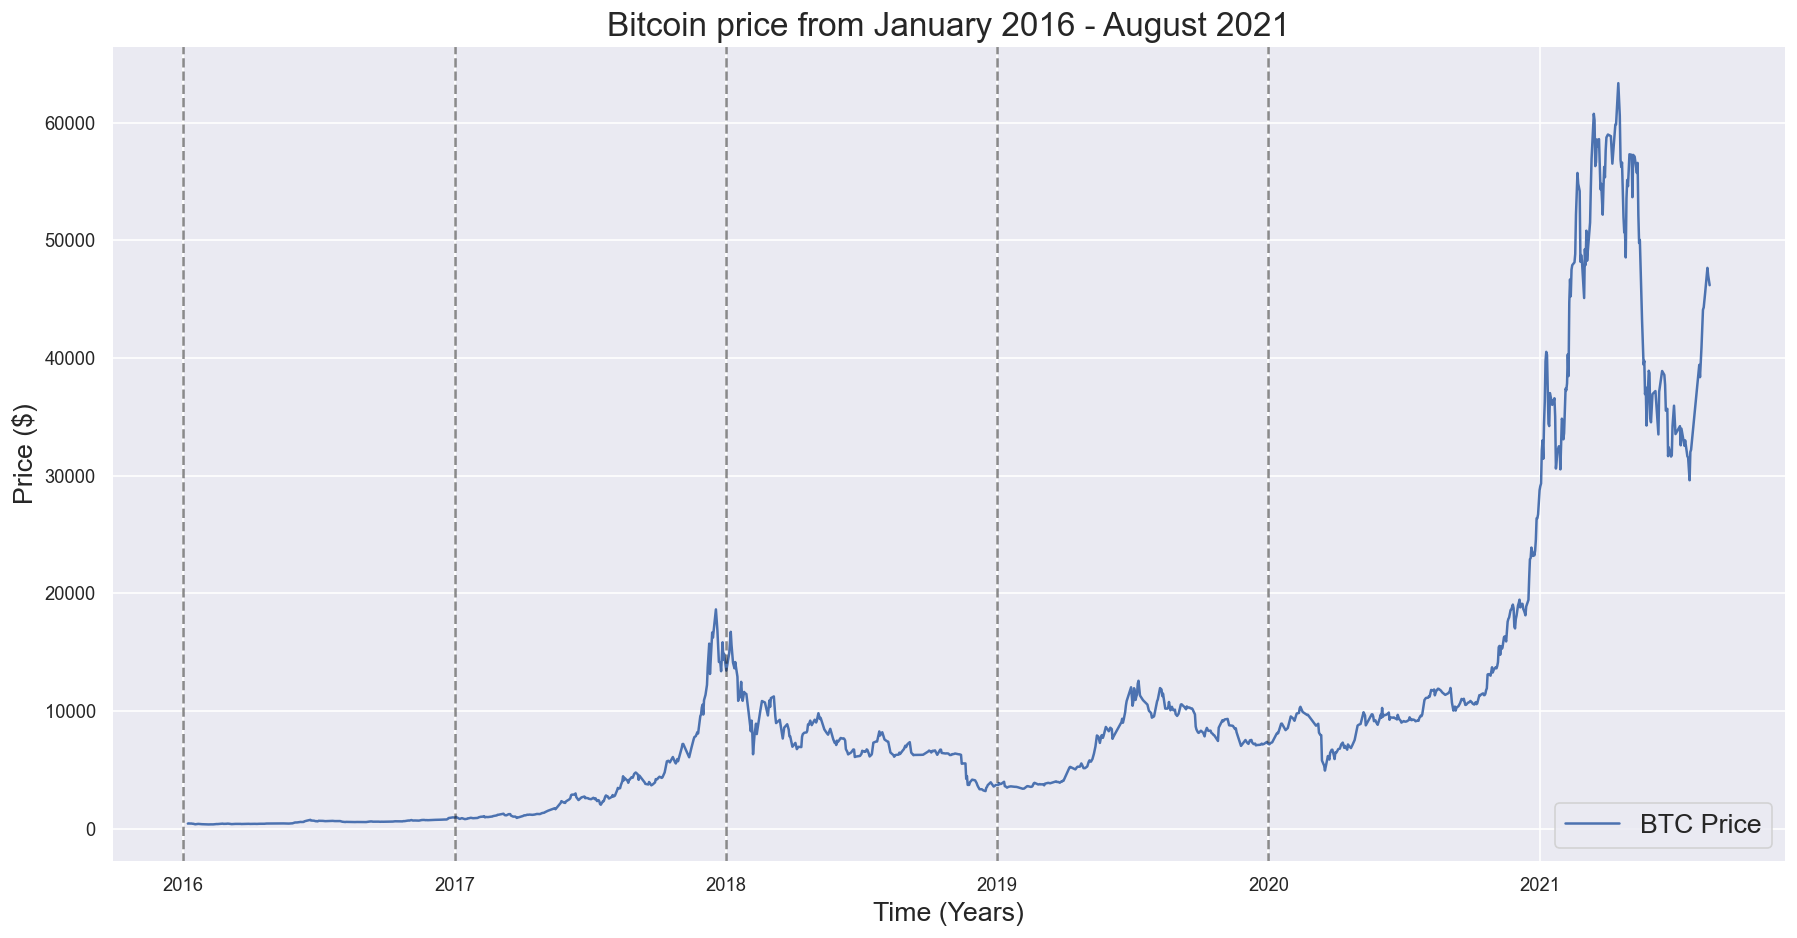

In [68]:
plt.figure(figsize=(18,9))
BTCprice, = plt.plot(dft['BTC Price'])
#size, = plt.plot(dft['size2'], color='red')

for year in range(2016, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
plt.title("Bitcoin price from January 2016 - August 2021", fontsize = 20)
plt.xlabel('Time (Years)', fontsize=16)
plt.ylabel('Price ($)', fontsize=16)
plt.legend(['BTC Price'], fontsize=16)
plt.savefig(f'{results_folder}/08 - BTC Price.png')

In [57]:
dft

BTC Price  size  datetest   size2  rollavg_size
date4                                                      
2016-01-01    432.358     3         0   15000           NaN
2016-01-02    433.773     1         1    5000           NaN
2016-01-03    431.985     5         2   25000           NaN
2016-01-04    431.691     5         3   25000           NaN
2016-01-05    433.732     5         4   25000           NaN
...               ...   ...       ...     ...           ...
2021-08-19        NaN    25      2044  125000     24.285714
2021-08-20        NaN    45      2045  225000     25.428571
2021-08-21        NaN    18      2046   90000     25.285714
2021-08-22        NaN    35      2047  175000     27.142857
2021-08-23        NaN    15      2048   75000     25.571429

[2049 rows x 5 columns]

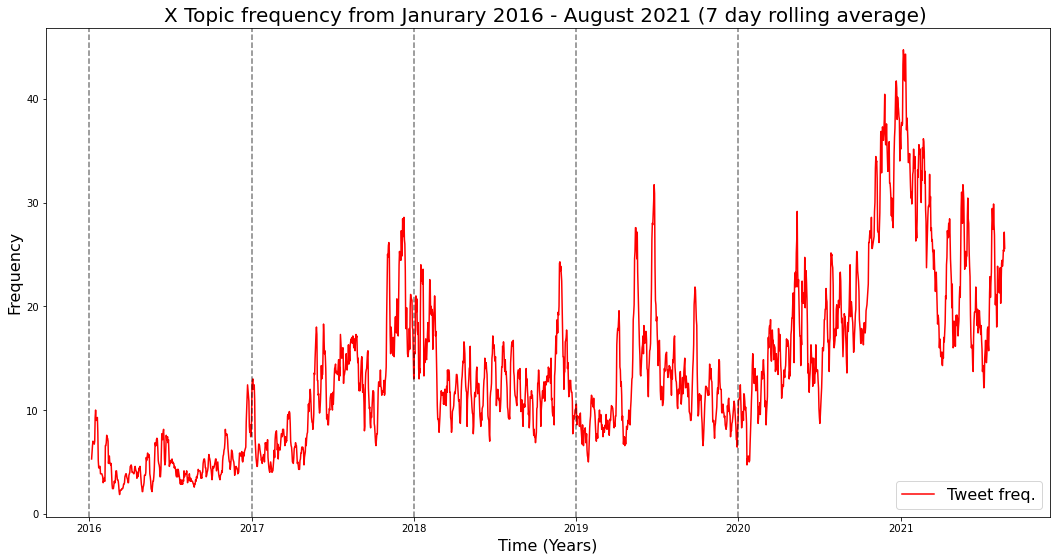

In [56]:
# do rolling average of the normalised data
dft['rollavg_size'] = dft['size'].rolling(7).mean()
plt.figure(figsize=(18,9))
BTCprice, = plt.plot(dft['rollavg_size'], color='red')
#size, = plt.plot(dft['size2'], color='red')

for year in range(2016, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
plt.title("X Topic frequency from Janurary 2016 - August 2021 (7 day rolling average) ", fontsize = 20)
plt.xlabel('Time (Years)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.legend(['Tweet freq.'], fontsize=16)
plt.savefig(f'{results_folder}/09 - Topic tweet frequency.png')

# normalise

In [365]:
dft1 = dft[['BTC Price', 'size']]
avgs = dft1.mean()
devs = dft1.std()
for col in dft1.columns:
    dft1[col] = (dft1[col] - avgs.loc[col]) / devs.loc[col]

<ipython-input-365-8ce1f9001875>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft1[col] = (dft1[col] - avgs.loc[col]) / devs.loc[col]


In [366]:
dft1


BTC Price      size
date4                          
2016-01-02  -0.753655 -1.411325
2016-01-04  -0.753813 -1.204819
2016-01-06  -0.754155 -1.204819
2016-01-08  -0.751884 -1.308072
2016-01-10  -0.752780 -0.895060
...               ...       ...
2021-08-15   2.771589  0.240722
2021-08-17   2.709319  0.653734
2021-08-19        NaN  0.447228
2021-08-21        NaN  1.376504
2021-08-23        NaN  0.550481

[1026 rows x 2 columns]

<ipython-input-368-68be964f5a72>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft1['rollavg_size'] = dft1['size'].rolling(7).mean()


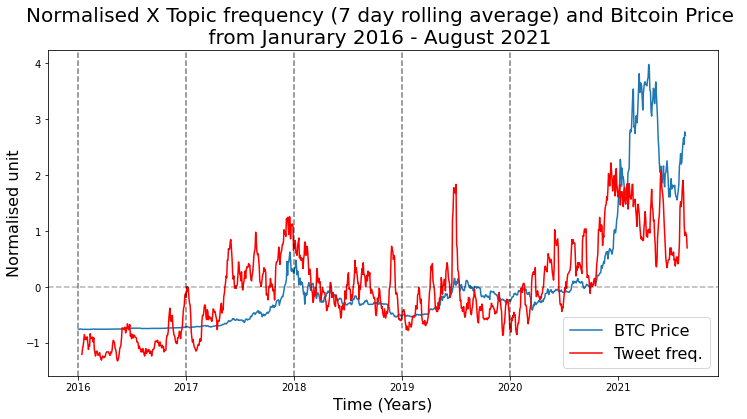

In [368]:
# do rolling average of the normalised data
dft1['rollavg_size'] = dft1['size'].rolling(7).mean()
plt.figure(figsize=(12,6))
BTCPrice, = plt.plot(dft1['BTC Price'])
size, = plt.plot(dft1['rollavg_size'], color='red')

for year in range(2016, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.title("Normalised X Topic frequency (7 day rolling average) and Bitcoin Price \n from Janurary 2016 - August 2021  ", fontsize = 20)
plt.xlabel('Time (Years)', fontsize=16)
plt.ylabel('Normalised unit', fontsize=16)
plt.legend(['BTC Price','Tweet freq.'], fontsize=16)
plt.savefig(f'{results_folder}/09 - Topic tweet frequency.png')

# take first difference to remove trend

In [369]:
dft1 = dft1.diff().dropna()


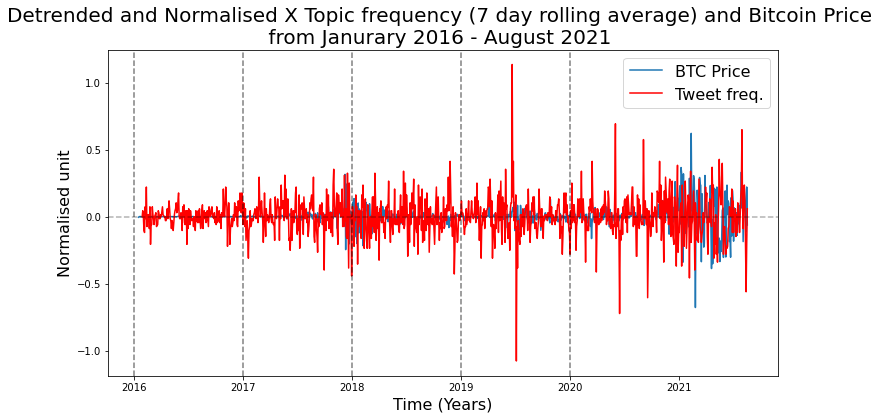

In [370]:
dft1['rollavg_size'] = dft1['size'].rolling(7).mean()
plt.figure(figsize=(12,6))
BTCPrice, = plt.plot(dft1['BTC Price'])
size, = plt.plot(dft1['rollavg_size'], color='red')

for year in range(2016, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.title("Detrended and Normalised X Topic frequency (7 day rolling average) and Bitcoin Price \n from Janurary 2016 - August 2021  ", fontsize = 20)
plt.xlabel('Time (Years)', fontsize=16)
plt.ylabel('Normalised unit', fontsize=16)
plt.legend(['BTC Price','Tweet freq.'], fontsize=16)
plt.savefig(f'{results_folder}/10 - Normalised.png')

# remove increasing volatility 

In [371]:
dft1.index = pd.to_datetime(dft1.index)
annual_volatility = dft1.groupby(dft1.index.year).std()
dft1['BTC_annual_vol'] = dft1.index.map(lambda d: annual_volatility.loc[d.year, 'BTC Price'])
dft1['size_annual_vol'] = dft1.index.map(lambda d: annual_volatility.loc[d.year, 'size'])

In [372]:
dft1['BTC Price'] = dft1['BTC Price'] / dft1['BTC_annual_vol']
dft1['size'] = dft1['size'] / dft1['size_annual_vol']

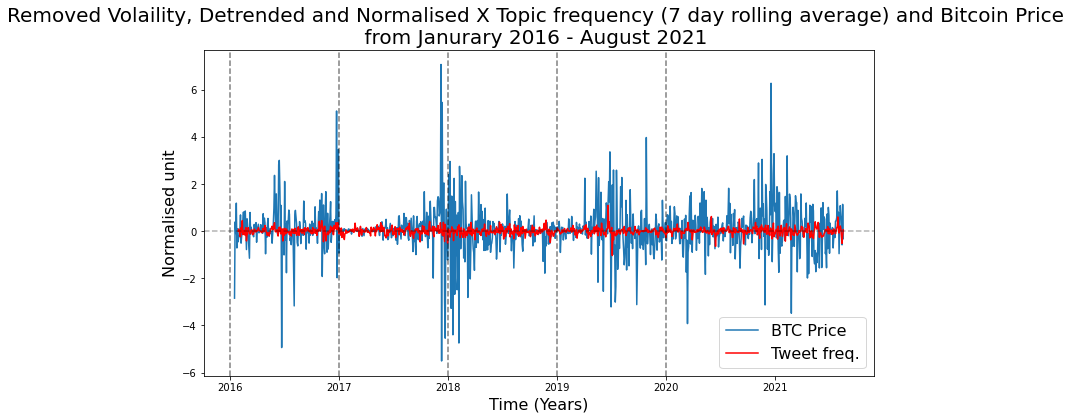

In [373]:
dft1['rollavg_size'] = dft1['size'].rolling(7).mean()
plt.figure(figsize=(12,6))
BTCPrice, = plt.plot(dft1['BTC Price'])
size, = plt.plot(dft1['rollavg_size'], color='red')

for year in range(2016, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.title("Removed Volaility, Detrended and Normalised X Topic frequency (7 day rolling average) and Bitcoin Price \n from Janurary 2016 - August 2021  ", fontsize = 20)
plt.xlabel('Time (Years)', fontsize=16)
plt.ylabel('Normalised unit', fontsize=16)
plt.legend(['BTC Price','Tweet freq.'], fontsize=16)
plt.savefig(f'{results_folder}/11 - Removed Volatility.png')

# Remove seasonality

In [374]:
month_avgs = dft1.groupby(dft1.index.month).mean()
dft1['BTC_month_avg'] = dft1.index.map(lambda d: month_avgs.loc[d.month, 'BTC Price'])
dft1['size_month_avg'] = dft1.index.map(lambda d: month_avgs.loc[d.month, 'size'])
dft1['BTC Price'] = dft1['BTC Price'] - dft1['BTC_month_avg']
dft1['size'] = dft1['size'] - dft1['size_month_avg']

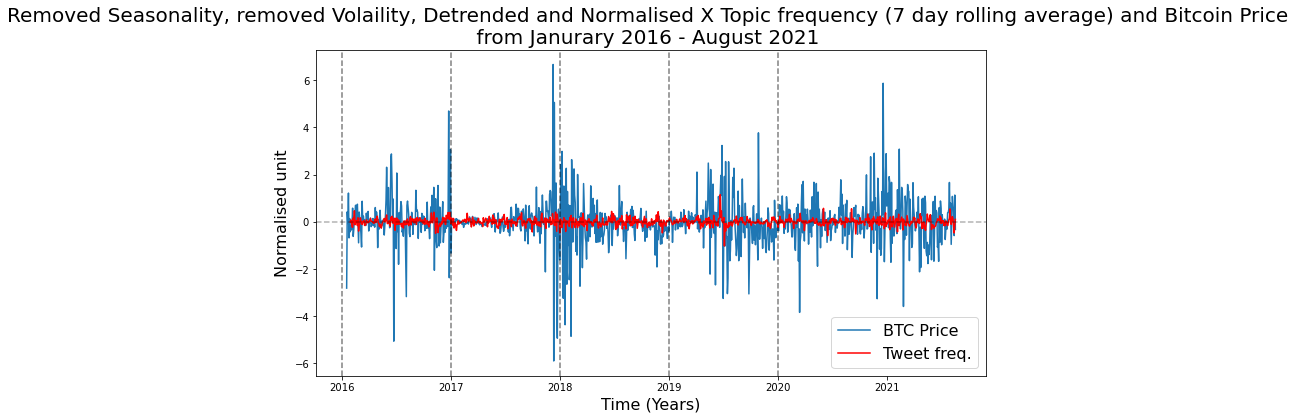

In [375]:
dft1['rollavg_size'] = dft1['size'].rolling(7).mean()
plt.figure(figsize=(12,6))
BTCPrice, = plt.plot(dft1['BTC Price'])
size, = plt.plot(dft1['rollavg_size'], color='red')

for year in range(2016, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.title("Removed Seasonality, removed Volaility, Detrended and Normalised X Topic frequency (7 day rolling average) and Bitcoin Price \n from Janurary 2016 - August 2021  ", fontsize = 20)
plt.xlabel('Time (Years)', fontsize=16)
plt.ylabel('Normalised unit', fontsize=16)
plt.legend(['BTC Price','Tweet freq.'], fontsize=16)
plt.savefig(f'{results_folder}/12 - Remove seasonality.png')

# VAr Model

In [380]:
dft1

BTC Price      size  rollavg_size  BTC_annual_vol  \
date4                                                           
2016-01-16  -2.811082  1.451612           NaN        0.001563   
2016-01-18   0.422512 -0.426814           NaN        0.001563   
2016-01-20  -0.067810  0.616756           NaN        0.001563   
2016-01-22   1.217723  0.199328           NaN        0.001563   
2016-01-24  -0.682577 -1.470384           NaN        0.001563   
...               ...       ...           ...             ...   
2021-08-09   0.652781  0.428730      0.126499        0.194843   
2021-08-11   0.496144 -1.485093     -0.173501        0.194843   
2021-08-13  -0.584168  0.715803     -0.473501        0.194843   
2021-08-15   1.134459 -0.815255     -0.145417        0.194843   
2021-08-17  -0.321734  0.428730      0.100646        0.194843   

            size_annual_vol  BTC_month_avg  size_month_avg  
date4                                                       
2016-01-16         0.494710      -0.031107        0.009386  
2016-01-18         0.494710      -0.031107        0.009386  
2016-01-20         0.494710      -0.031107        0.009386  
2016-01-22         0.494710      -0.031107        0.009386  
2016-01-24         0.494710      -0.031107        0.009386  
...                     ...            ...             ...  
2021-08-09         1.079023       0.002142       -0.045965  
2021-08-11         1.079023       0.002142       -0.045965  
2021-08-13         1.079023       0.002142       -0.045965  
2021-08-15         1.079023       0.002142       -0.045965  
2021-08-17         1.079023       0.002142       -0.045965  

[1016 rows x 7 columns]

In [378]:
dft1.index = pd.DatetimeIndex(dft1.index).to_period('d')
dft1

BTC Price      size  rollavg_size  BTC_annual_vol  \
date4                                                           
2016-01-16  -2.811082  1.451612           NaN        0.001563   
2016-01-18   0.422512 -0.426814           NaN        0.001563   
2016-01-20  -0.067810  0.616756           NaN        0.001563   
2016-01-22   1.217723  0.199328           NaN        0.001563   
2016-01-24  -0.682577 -1.470384           NaN        0.001563   
...               ...       ...           ...             ...   
2021-08-09   0.652781  0.428730      0.126499        0.194843   
2021-08-11   0.496144 -1.485093     -0.173501        0.194843   
2021-08-13  -0.584168  0.715803     -0.473501        0.194843   
2021-08-15   1.134459 -0.815255     -0.145417        0.194843   
2021-08-17  -0.321734  0.428730      0.100646        0.194843   

            size_annual_vol  BTC_month_avg  size_month_avg  
date4                                                       
2016-01-16         0.494710      -0.031107        0.009386  
2016-01-18         0.494710      -0.031107        0.009386  
2016-01-20         0.494710      -0.031107        0.009386  
2016-01-22         0.494710      -0.031107        0.009386  
2016-01-24         0.494710      -0.031107        0.009386  
...                     ...            ...             ...  
2021-08-09         1.079023       0.002142       -0.045965  
2021-08-11         1.079023       0.002142       -0.045965  
2021-08-13         1.079023       0.002142       -0.045965  
2021-08-15         1.079023       0.002142       -0.045965  
2021-08-17         1.079023       0.002142       -0.045965  

[1016 rows x 7 columns]

In [379]:
dft1var = dft1[['BTC Price', 'size']]
model = VAR(dft1var)
model_fit = model.fit(maxlags=30)
model_fit.summary()
# look at btc price, and those that are significant are the ones that impact btc price 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 16, Sep, 2021
Time:                     19:14:33
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   0.165901
Nobs:                     986.000    HQIC:                 -0.209312
Log likelihood:          -2459.42    FPE:                   0.644496
AIC:                    -0.439602    Det(Omega_mle):        0.571585
--------------------------------------------------------------------
Results for equation BTC Price
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 0.004129         0.031013            0.133           0.894
L1.BTC Price         -0.028518         0.032850           -0.868           0.385
L1.size               0.219862         0.041169         

#  PACF 

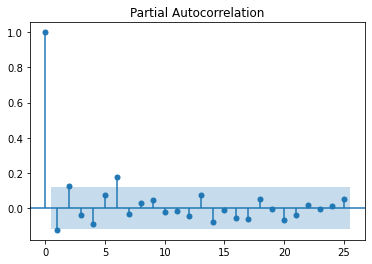

In [246]:
plot_pacf(dft1['BTC Price'])
plt.show()

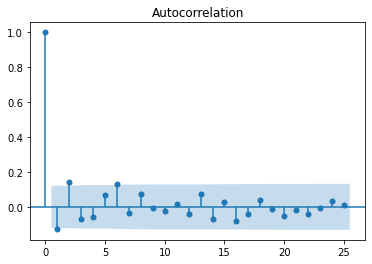

In [152]:
plot_acf(dft1['BTC Price'])
plt.show()

In [153]:
dft1

BTC Price      size  rollavg_size  BTC_annual_vol  \
date4                                                           
2016-03-08  -0.266327  0.155271  0.000000e+00             1.0   
2016-04-01  -0.075576  0.033682 -5.551115e-17             1.0   
2016-04-05   0.007201  0.033682  5.551115e-17             1.0   
2016-04-21   0.313865  0.033682 -5.551115e-17             1.0   
2016-04-25   0.179991  0.033682  5.551115e-17             1.0   
...               ...       ...           ...             ...   
2021-07-12  -0.073915 -0.955058  0.000000e+00             1.0   
2021-07-20  -0.955605  0.107398 -2.653560e-01             1.0   
2021-07-26   0.673363  0.107398  0.000000e+00             1.0   
2021-08-05   1.125906 -0.046469  0.000000e+00             1.0   
2021-08-09   0.943343  2.078443  2.653560e-01             1.0   

            size2_annual_vol  size_annual_vol  BTC_month_avg  size_month_avg  
date4                                                                         
2016-03-08          1.758793         1.758793      -0.120631       -0.155271  
2016-04-01          1.758793         1.758793       0.110756       -0.033682  
2016-04-05          1.758793         1.758793       0.110756       -0.033682  
2016-04-21          1.758793         1.758793       0.110756       -0.033682  
2016-04-25          1.758793         1.758793       0.110756       -0.033682  
...                      ...              ...            ...             ...  
2021-07-12          1.748300         1.748300       0.163221       -0.107398  
2021-07-20          1.748300         1.748300       0.163221       -0.107398  
2021-07-26          1.748300         1.748300       0.163221       -0.107398  
2021-08-05          1.748300         1.748300       0.084037        0.046469  
2021-08-09          1.748300         1.748300       0.084037        0.046469  

[266 rows x 8 columns]

In [248]:
for lag in range(1, 30):
    heater_series = dft1['BTC Price'].iloc[lag:]
    lagged_ice_cream_series = dft1['size'].iloc[:-lag]
    print('Lag: %s'%lag)
    print(pearsonr(heater_series, lagged_ice_cream_series))
    print('------')

Lag: 1
(0.02302010220529156, 0.7091350005852596)
------
Lag: 2
(-0.060393613601188195, 0.32831362172846285)
------
Lag: 3
(0.08590376947510737, 0.16481506416186498)
------
Lag: 4
(-0.07024691426444471, 0.257210447423236)
------
Lag: 5
(0.02398381741135231, 0.699743964322636)
------
Lag: 6
(-0.009192786860056229, 0.8827230714044042)
------
Lag: 7
(0.0009516571685305414, 0.9878395970435884)
------
Lag: 8
(-0.05786206519925364, 0.35462000403889665)
------
Lag: 9
(0.06494763268452237, 0.2996381266621653)
------
Lag: 10
(-0.00010616153621425747, 0.9986513587020618)
------
Lag: 11
(-0.06745408593311955, 0.2832325673134705)
------
Lag: 12
(-0.018821118418094737, 0.7653168583923372)
------
Lag: 13
(0.05343985068377855, 0.39732483645059014)
------
Lag: 14
(-0.03145171965237433, 0.6192445693458812)
------
Lag: 15
(0.025301209217545598, 0.6899598347132545)
------
Lag: 16
(-0.012748913683444402, 0.8410301571519145)
------
Lag: 17
(0.028436238682791694, 0.6552008801049463)
------
Lag: 18
(-0.154099

In [5]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
#series = read_csv('airline-passengers.csv', header=0, index_col=0)


In [33]:
btc_price_df2

Currency  Closing Price (USD)  24h Open (USD)  24h High (USD)  \
Date                                                                       
2013-10-01      BTC           123.654990      124.304660      124.751660   
2013-10-02      BTC           125.455000      123.654990      125.758500   
2013-10-03      BTC           108.584830      125.455000      125.665660   
2013-10-04      BTC           118.674660      108.584830      118.675000   
2013-10-05      BTC           121.338660      118.674660      121.936330   
...             ...                  ...             ...             ...   
2021-08-14      BTC         47654.729022    44433.880228    47861.031980   
2021-08-15      BTC         47004.357461    47810.373711    48126.473768   
2021-08-16      BTC         47144.842567    47099.469780    47370.906853   
2021-08-17      BTC         46181.730824    47004.047648    48048.744781   
2021-08-18      BTC         44887.242787    45930.416150    47137.389263   

            24h Low (USD)     BTC Price       Date       Date1  
Date                                                            
2013-10-01     122.563490    123.654990 2013-10-01  2013-10-01  
2013-10-02     123.633830    125.455000 2013-10-02  2013-10-02  
2013-10-03      83.328330    108.584830 2013-10-03  2013-10-03  
2013-10-04     107.058160    118.674660 2013-10-04  2013-10-04  
2013-10-05     118.005660    121.338660 2013-10-05  2013-10-05  
...                   ...           ...        ...         ...  
2021-08-14   44264.697085  47654.729022 2021-08-14  2021-08-14  
2021-08-15   46063.802197  47004.357461 2021-08-15  2021-08-15  
2021-08-16   45619.599550  47144.842567 2021-08-16  2021-08-16  
2021-08-17   45694.801774  46181.730824 2021-08-17  2021-08-17  
2021-08-18   44460.220565  44887.242787 2021-08-18  2021-08-18  

[2879 rows x 8 columns]

In [43]:
btc_price_df2 = btc_price_df.asfreq(pd.infer_freq(btc_price_df.index))
btc_price_df2
btc_price_df2 = btc_price_df2.fillna(method='bfill').fillna(method='ffill')

In [44]:
btc_price_df2

Currency  Closing Price (USD)  24h Open (USD)  24h High (USD)  \
Date                                                                       
2013-10-01      BTC           123.654990      124.304660      124.751660   
2013-10-02      BTC           125.455000      123.654990      125.758500   
2013-10-03      BTC           108.584830      125.455000      125.665660   
2013-10-04      BTC           118.674660      108.584830      118.675000   
2013-10-05      BTC           121.338660      118.674660      121.936330   
...             ...                  ...             ...             ...   
2021-08-14      BTC         47654.729022    44433.880228    47861.031980   
2021-08-15      BTC         47004.357461    47810.373711    48126.473768   
2021-08-16      BTC         47144.842567    47099.469780    47370.906853   
2021-08-17      BTC         46181.730824    47004.047648    48048.744781   
2021-08-18      BTC         44887.242787    45930.416150    47137.389263   

            24h Low (USD)     BTC Price       Date       Date1  
Date                                                            
2013-10-01     122.563490    123.654990 2013-10-01  2013-10-01  
2013-10-02     123.633830    125.455000 2013-10-02  2013-10-02  
2013-10-03      83.328330    108.584830 2013-10-03  2013-10-03  
2013-10-04     107.058160    118.674660 2013-10-04  2013-10-04  
2013-10-05     118.005660    121.338660 2013-10-05  2013-10-05  
...                   ...           ...        ...         ...  
2021-08-14   44264.697085  47654.729022 2021-08-14  2021-08-14  
2021-08-15   46063.802197  47004.357461 2021-08-15  2021-08-15  
2021-08-16   45619.599550  47144.842567 2021-08-16  2021-08-16  
2021-08-17   45694.801774  46181.730824 2021-08-17  2021-08-17  
2021-08-18   44460.220565  44887.242787 2021-08-18  2021-08-18  

[2879 rows x 8 columns]

<ipython-input-45-1448fd842f20>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(btc_price_df2['BTC Price'], freq=365)


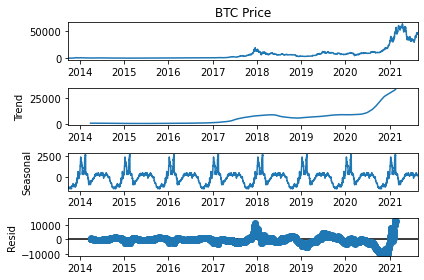

In [45]:
result = seasonal_decompose(btc_price_df2['BTC Price'], freq=365)
result.plot()
pyplot.show()

In [39]:
btc_price_df2['BTC Price']

Date
2013-10-01      123.654990
2013-10-02      125.455000
2013-10-03      108.584830
2013-10-04      118.674660
2013-10-05      121.338660
                  ...     
2021-08-14    47654.729022
2021-08-15    47004.357461
2021-08-16    47144.842567
2021-08-17    46181.730824
2021-08-18    44887.242787
Freq: D, Name: BTC Price, Length: 2879, dtype: float64

# Start the time series stuff
From https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [58]:
dft

BTC Price  size  datetest   size2  rollavg_size
date4                                                      
2016-01-01    432.358     3         0   15000           NaN
2016-01-02    433.773     1         1    5000           NaN
2016-01-03    431.985     5         2   25000           NaN
2016-01-04    431.691     5         3   25000           NaN
2016-01-05    433.732     5         4   25000           NaN
...               ...   ...       ...     ...           ...
2021-08-19        NaN    25      2044  125000     24.285714
2021-08-20        NaN    45      2045  225000     25.428571
2021-08-21        NaN    18      2046   90000     25.285714
2021-08-22        NaN    35      2047  175000     27.142857
2021-08-23        NaN    15      2048   75000     25.571429

[2049 rows x 5 columns]

In [60]:
dft1 = dft[['BTC Price', 'size']]

In [61]:
dft1

BTC Price  size
date4                      
2016-01-01    432.358     3
2016-01-02    433.773     1
2016-01-03    431.985     5
2016-01-04    431.691     5
2016-01-05    433.732     5
...               ...   ...
2021-08-19        NaN    25
2021-08-20        NaN    45
2021-08-21        NaN    18
2021-08-22        NaN    35
2021-08-23        NaN    15

[2049 rows x 2 columns]

In [69]:
dft1 = dft1.dropna()

In [70]:
dft1

BTC Price  size
date4                         
2016-01-01    432.358000     3
2016-01-02    433.773000     1
2016-01-03    431.985000     5
2016-01-04    431.691000     5
2016-01-05    433.732000     5
...                  ...   ...
2021-08-14  47654.729022    19
2021-08-15  47004.357461    22
2021-08-16  47144.842567    26
2021-08-17  46181.730824    27
2021-08-18  44887.242787    14

[2044 rows x 2 columns]

In [72]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=30
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(dft1, variables = dft1.columns)   

BTC Price_x  size_x
BTC Price_y          1.0     0.0
size_y               0.0     1.0

In [73]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(dft1)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
BTC Price ::  32.01     > 12.3212   =>   True
size   ::  0.15      > 4.1296    =>   False


In [76]:
dft1

BTC Price  size
date4                         
2016-01-01    432.358000     3
2016-01-02    433.773000     1
2016-01-03    431.985000     5
2016-01-04    431.691000     5
2016-01-05    433.732000     5
...                  ...   ...
2021-08-14  47654.729022    19
2021-08-15  47004.357461    22
2021-08-16  47144.842567    26
2021-08-17  46181.730824    27
2021-08-18  44887.242787    14

[2044 rows x 2 columns]

In [98]:
nobs =  365
dft1_train, dft1_test = dft1[0:-nobs], dft1[-nobs:]

# Check size
print(dft1_train.shape)  # (119, 8)
print(dft1_test.shape)  # (4, 8)

(1679, 2)
(365, 2)


In [99]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [100]:
for name, column in dft1_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "BTC Price" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.5615
 No. Lags Chosen       = 25
 Critical value 1%     = -3.434
 Critical value 5%     = -2.863
 Critical value 10%    = -2.568
 => P-Value = 0.5029. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "size" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.578
 No. Lags Chosen       = 16
 Critical value 1%     = -3.434
 Critical value 5%     = -2.863
 Critical value 10%    = -2.568
 => P-Value = 0.0062. Rejecting Null Hypothesis.
 => Series is Stationary.




In [101]:
df_differenced = dft1_train.diff().dropna()

In [102]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "BTC Price" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.5079
 No. Lags Chosen       = 25
 Critical value 1%     = -3.434
 Critical value 5%     = -2.863
 Critical value 10%    = -2.568
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "size" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -14.5301
 No. Lags Chosen       = 19
 Critical value 1%     = -3.434
 Critical value 5%     = -2.863
 Critical value 10%    = -2.568
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.




In [103]:
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

C:\Users\T430\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Lag Order = 1
AIC :  15.65777576567624
BIC :  15.67718457341085
FPE :  6310817.44272165
HQIC:  15.664965895180528 

Lag Order = 2
AIC :  15.547106841117804
BIC :  15.57947059577796
FPE :  5649665.379603946
HQIC:  15.5590965816704 

Lag Order = 3
AIC :  15.497467802925712
BIC :  15.542799121265789
FPE :  5376068.485614953
HQIC:  15.514262117069856 

Lag Order = 4
AIC :  15.470469922581037
BIC :  15.528781441409526
FPE :  5232868.362584746
HQIC:  15.492073780971836 

Lag Order = 5
AIC :  15.454659910427592
BIC :  15.52596428665097
FPE :  5150788.096755601
HQIC:  15.48107829185007 

Lag Order = 6
AIC :  15.417192542886083
BIC :  15.501502453552805
FPE :  4961373.469832359
HQIC:  15.448430434273282 

Lag Order = 7
AIC :  15.411707737404782
BIC :  15.509035879749403
FPE :  4934237.458596765
HQIC:  15.447770133855931 

Lag Order = 8
AIC :  15.410843224107966
BIC :  15.521202315595371
FPE :  4929975.76745667
HQIC:  15.451735128906677 

Lag Order = 9
AIC :  15.410843722279948
BIC :  15.5342465

In [104]:
x = model.select_order(maxlags=12)
x.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [105]:
model_fitted = model.fit(2)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 25, Sep, 2021
Time:                     17:28:49
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    15.5795
Nobs:                     1676.00    HQIC:                   15.5591
Log likelihood:          -17774.8    FPE:                5.64967e+06
AIC:                      15.5471    Det(Omega_mle):     5.61611e+06
--------------------------------------------------------------------
Results for equation BTC Price
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                7.223143         7.946903            0.909           0.363
L1.BTC Price        -0.057392         0.024543           -2.338           0.019
L1.size              3.793934         1.032893            3.

In [106]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(dft1.columns, out):
    print(col, ':', round(val, 2))

BTC Price : 2.0
size : 2.15


In [107]:
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

2


array([[  1.3202203 ,   3.        ],
       [502.16471448, -20.        ]])

In [122]:
df_differenced.values[-2]

array([1.3202203, 3.       ])

In [108]:
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=dft1.index[-nobs:], columns=dft1.columns + '_1d')
df_forecast

BTC Price_1d    size_1d
date4                              
2020-08-19    -90.950918  10.999069
2020-08-20     25.530176  -0.372874
2020-08-21     25.480462  -3.370129
2020-08-22     -7.089198   2.229510
2020-08-23      9.542753  -0.248176
...                  ...        ...
2021-08-14      7.091771   0.011660
2021-08-15      7.091771   0.011660
2021-08-16      7.091771   0.011660
2021-08-17      7.091771   0.011660
2021-08-18      7.091771   0.011660

[365 rows x 2 columns]

In [109]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [114]:
df_results = invert_transformation(df_differenced, df_forecast, second_diff=False)        


In [115]:
df_results

BTC Price_1d    size_1d  BTC Price_forecast  size_forecast
date4                                                                 
2020-08-19    -90.950918  10.999069          411.213797      -9.000931
2020-08-20     25.530176  -0.372874          436.743973      -9.373805
2020-08-21     25.480462  -3.370129          462.224435     -12.743934
2020-08-22     -7.089198   2.229510          455.135237     -10.514424
2020-08-23      9.542753  -0.248176          464.677990     -10.762600
...                  ...        ...                 ...            ...
2021-08-14      7.091771   0.011660         2990.599332      -6.860181
2021-08-15      7.091771   0.011660         2997.691103      -6.848521
2021-08-16      7.091771   0.011660         3004.782874      -6.836862
2021-08-17      7.091771   0.011660         3011.874645      -6.825202
2021-08-18      7.091771   0.011660         3018.966416      -6.813542

[365 rows x 4 columns]

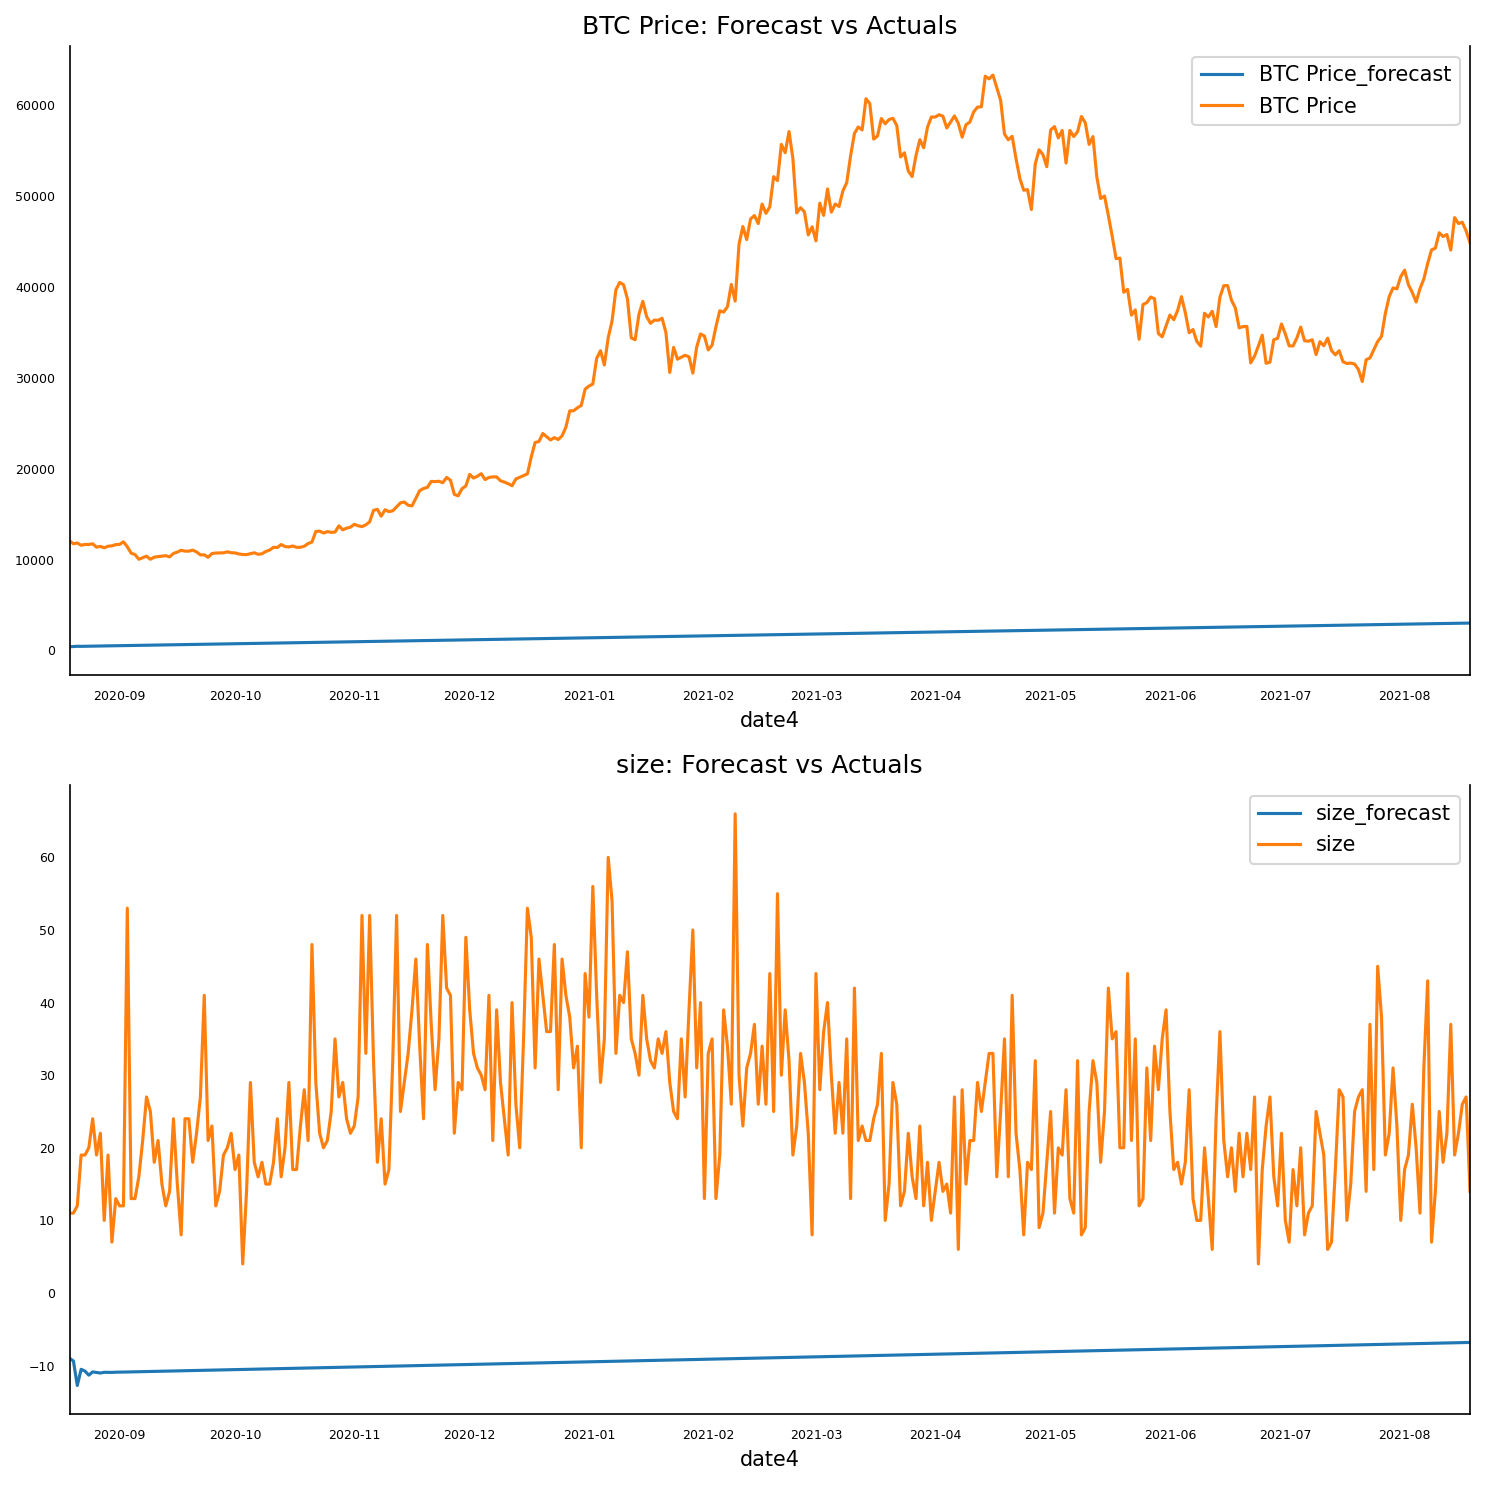

In [116]:
fig, axes = plt.subplots(nrows=int(len(dft1.columns)), ncols=1, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(dft1.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    dft1_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

# AIMAX STUFF

In [112]:
dft1 = dft.dropna()

In [113]:
dft1

BTC Price  size  datetest   size2
Date1                                           
2016-01-02    433.773000   0.0         0     0.0
2016-01-03    431.985000   0.0         1     0.0
2016-01-04    431.691000   0.0         2     0.0
2016-01-05    433.732000   0.0         3     0.0
2016-01-06    427.164000   0.0         4     0.0
...                  ...   ...       ...     ...
2021-08-14  47654.729022   1.0      2036  5000.0
2021-08-15  47004.357461   1.0      2037  5000.0
2021-08-16  47144.842567   0.0      2038     0.0
2021-08-17  46181.730824   1.0      2039  5000.0
2021-08-18  44887.242787   0.0      2040     0.0

[2041 rows x 4 columns]

In [114]:
dfbtc = dft1['BTC Price']

In [115]:
dfbtc

Date1
2016-01-02      433.773000
2016-01-03      431.985000
2016-01-04      431.691000
2016-01-05      433.732000
2016-01-06      427.164000
                  ...     
2021-08-14    47654.729022
2021-08-15    47004.357461
2021-08-16    47144.842567
2021-08-17    46181.730824
2021-08-18    44887.242787
Name: BTC Price, Length: 2041, dtype: float64

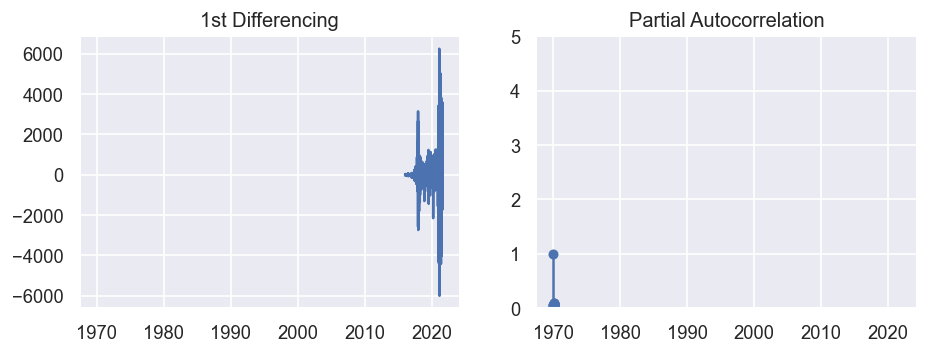

In [116]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(dft1['BTC Price'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(dft1['BTC Price'].diff().dropna(), ax=axes[1])

plt.show()

In [117]:
import statsmodels.api as sm

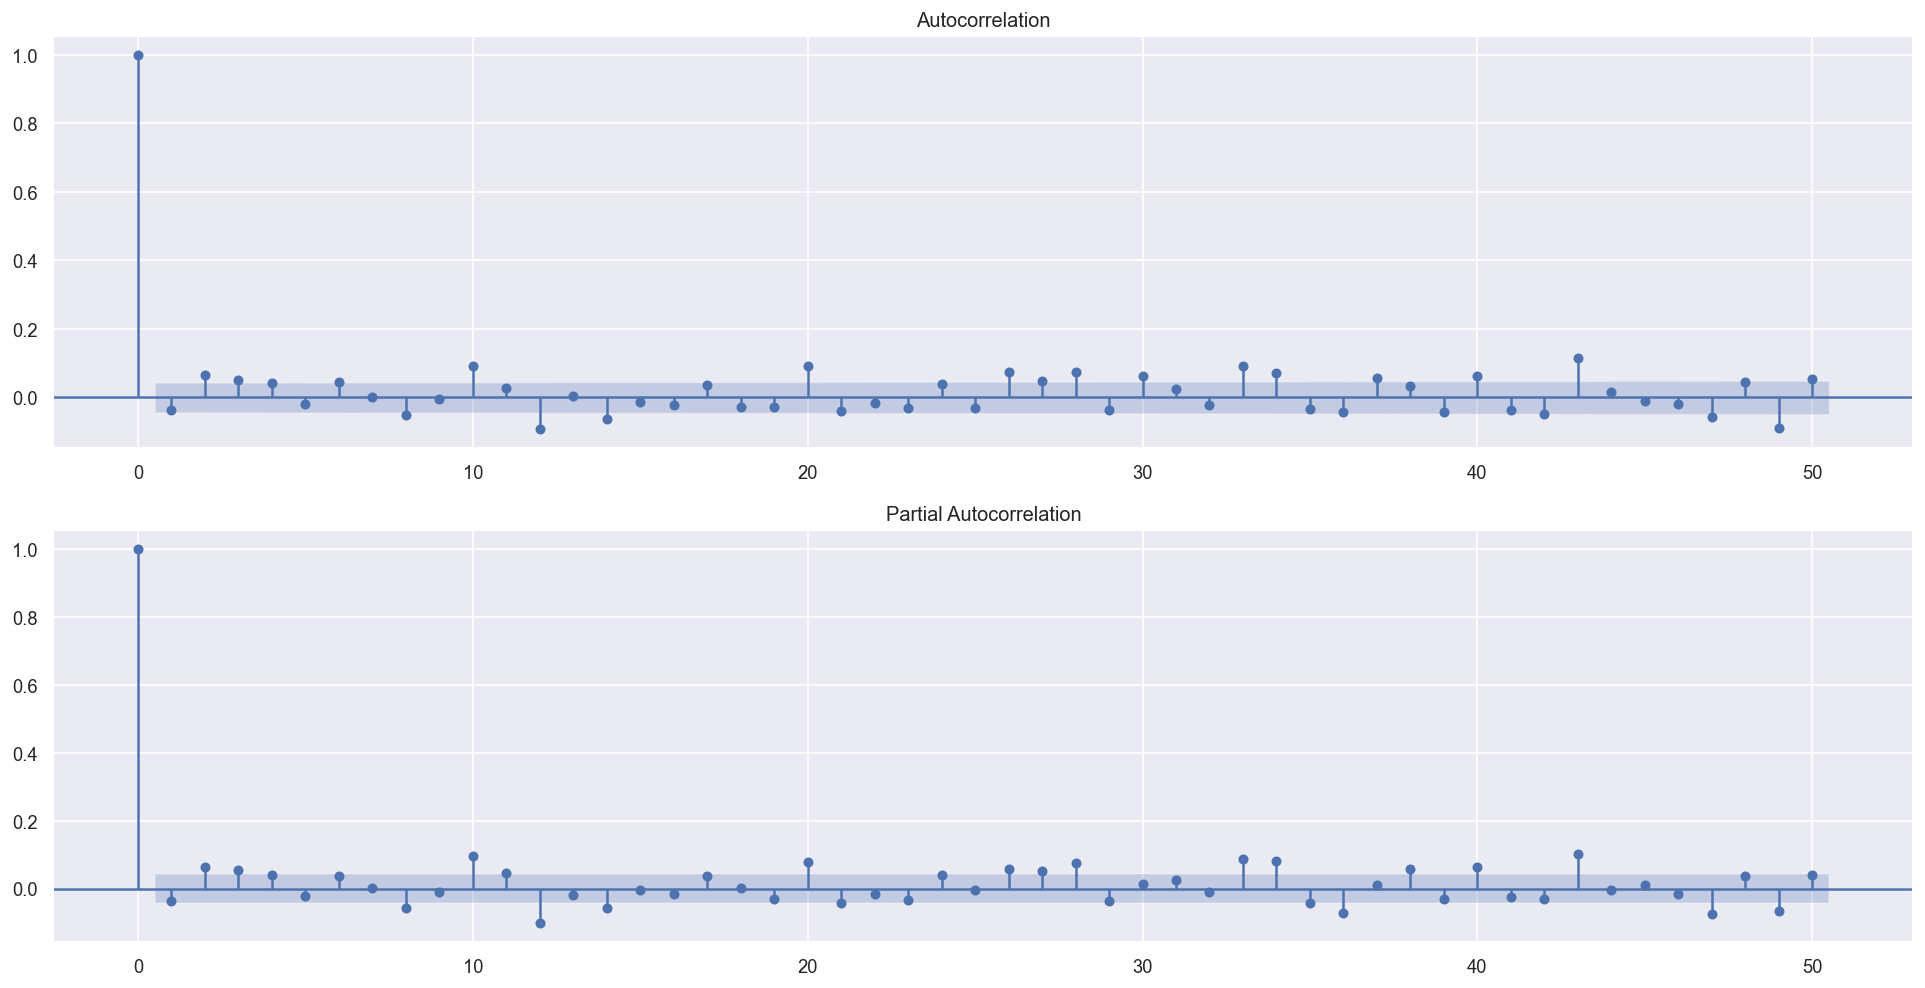

In [118]:
fig,ax = plt.subplots(2,1,figsize=(20,10))
fig = sm.graphics.tsa.plot_acf(dft1['BTC Price'].diff().dropna(), lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(dft1['BTC Price'].diff().dropna(), lags=50, ax=ax[1])
plt.show()

In [119]:
dft2 = dft1

In [120]:
df_differenced = dfbtc.diff().dropna()

In [121]:
df_differenced

Date1
2016-01-03      -1.788000
2016-01-04      -0.294000
2016-01-05       2.041000
2016-01-06      -6.568000
2016-01-07      13.857000
                 ...     
2021-08-14    3575.968349
2021-08-15    -650.371561
2021-08-16     140.485106
2021-08-17    -963.111743
2021-08-18   -1294.488036
Name: BTC Price, Length: 2040, dtype: float64

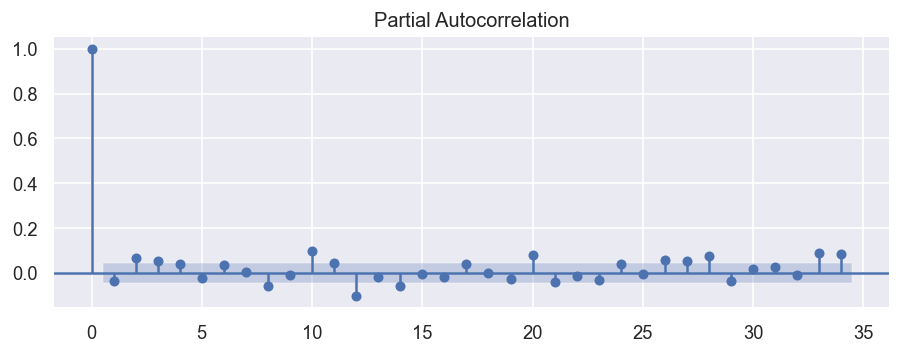

In [122]:
plot_pacf(df_differenced)
plt.show()


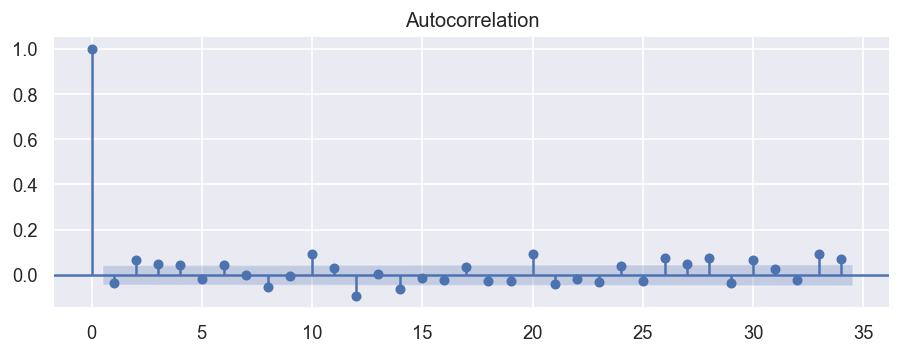

In [123]:
plot_acf(df_differenced)
plt.show()

go for p = q = 4

In [124]:
exog = dft1['size']

In [125]:


#resDiff = sm.tsa.arma_order_select_ic(dft1['BTC Price'], max_ar=7, max_ma=7, ic='aic', trend='c')
#print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

#this says for for 7 7 

In [143]:
nobs =  180
dft1_train, dft1_test = dft1[0:-nobs], dft1[-nobs:]

# Check size
print(dft1_train.shape)  # (119, 8)
print(dft1_test.shape)  # (4, 8)

(1861, 4)
(180, 4)


In [144]:
arimax = sm.tsa.statespace.SARIMAX(dft1_train['BTC Price'],order=(2,1,2),seasonal_order=(0,0,0,0),exog = dft1_train['size'],
                                  enforce_stationarity=False, enforce_invertibility=False,).fit()
arimax.summary()

C:\Users\T430\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\T430\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              BTC Price   No. Observations:                 1861
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -14026.564
Date:                Sun, 26 Sep 2021   AIC                          28065.128
Time:                        19:06:10   BIC                          28098.288
Sample:                             0   HQIC                         28077.349
                               - 1861                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
size         -25.3610      6.972     -3.637      0.000     -39.026     -11.696
ar.L1         -1.2021      0.007   -183.841      0.000      -1.215      -1.189
ar.L2         -0.9994      0.006   -168.905      0.000      -1.011      -0.988
ma.L1          1.2068      0.009    130.408      0.000       1.189       1.225
ma.L2          0.9537      0.009    110.433      0.000       0.937       0.971
sigma2      2.222e+05   2188.701    101.518      0.000    2.18e+05    2.26e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.88   Jarque-Bera (JB):             85952.61
Prob(Q):                              0.35   Prob(JB):                         0.00
Heteroskedasticity (H):              58.04   Skew:                             1.06
Prob(H) (two-sided):                  0.00   Kurtosis:                        36.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [133]:
# from statsmodels.tsa.arima_model import ARIMA

# # 1,1,2 ARIMA Model
# model = ARIMA(dfbtc, order=(2,1,2))
# model_fit = model.fit(disp=0)
# print(model_fit.summary())

In [165]:
import pmdarima as pm

# SARIMAX Model
sxmodel = pm.auto_arima(dft1_train[['BTC Price']], exogenous=dft1_train[['size']],
                           start_p=2, start_q=2,
                           test='adf',
                           max_p=2, max_q=2, m=91,
                           start_P=0, seasonal=True,
                           d=1, D=None, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel.summary()

Performing stepwise search to minimize aic


KeyboardInterrupt: 

In [ ]:
# Forecast
n_periods = 24
fitted, confint = sxmodel.predict(n_periods=n_periods, 
                                  exogenous=np.tile(seasonal_index.value, 2).reshape(-1,1), 
                                  return_conf_int=True)

index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data['value'])
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMAX Forecast of a10 - Drug Sales")
plt.show()

In [158]:
dft1_train['forecast'] = arimax.predict()

<ipython-input-158-2cb7adf59c82>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft1_train['forecast'] = arimax.predict()


In [160]:
arimax.plot_fit(figsize=(15,10))

AttributeError: 'SARIMAXResults' object has no attribute 'plot_fit'

In [164]:
!pip install git+https://github.com/RJT1990/pyflux

  Cloning https://github.com/RJT1990/pyflux to c:\users\t430\appdata\local\temp\pip-req-build-epb9t7gm
  Created wheel for pyflux: filename=pyflux-0.4.17-cp38-cp38-win_amd64.whl size=1364277 sha256=3d20a203345f4b25112be4b737590880b355717884e53eed3f6d8024254c66d4
  Stored in directory: C:\Users\T430\AppData\Local\Temp\pip-ephem-wheel-cache-r_kxlzac\wheels\aa\14\b1\b5b861928ef9eb74a08f8e64fe40c43aaae02edcf17f3f264a
Successfully built pyflux


  Running command git clone -q https://github.com/RJT1990/pyflux 'C:\Users\T430\AppData\Local\Temp\pip-req-build-epb9t7gm'


In [167]:
dft1_train

BTC Price  size  datetest    size2      forecast
Date1                                                          
2016-01-02    433.773000   0.0         0      0.0      0.000000
2016-01-03    431.985000   0.0         1      0.0    173.058754
2016-01-04    431.691000   0.0         2      0.0    333.061191
2016-01-05    433.732000   0.0         3      0.0    487.593238
2016-01-06    427.164000   0.0         4      0.0    403.020998
...                  ...   ...       ...      ...           ...
2021-02-15  49151.167576   0.0      1856      0.0  47965.995993
2021-02-16  48125.992195   2.0      1857  10000.0  48767.191295
2021-02-17  48840.414475   1.0      1858   5000.0  47534.666162
2021-02-18  52165.302555   3.0      1859  15000.0  49899.424288
2021-02-19  51728.508797   0.0      1860      0.0  51474.742752

[1861 rows x 5 columns]

In [169]:
import pyflux as pf

In [174]:
dft1_train['Price'] = dft1_train['BTC Price']

In [177]:
model = pf.ARIMAX(data=dft1_train, formula='Price~1+size2',
                  ar=2, ma=2, family=pf.Normal(), integ=1)
x = model.fit("MLE")
x.summary()

Normal ARIMAX(2,1,2)                                                                                      
======================================================= ==================================================
Dependent Variable: Differenced Price                   Method: MLE                                       
Start Date: 2016-01-04                                  Log Likelihood: -14075.1134                       
End Date: 2021-02-19                                    AIC: 28164.2269                                   
Number of observations: 1858                            BIC: 28202.9177                                   
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
AR(1)                                    0.208      0.078      2.6665   0.0077   (0.0551 | 0.3609)        
AR(2)                                

# new try
from this article https://medium.datadriveninvestor.com/time-series-prediction-using-sarimax-a6604f258c56

In [203]:
from sklearn.preprocessing import MinMaxScaler
sc_in = MinMaxScaler(feature_range=(0, 1)
                    )
scaled_input = sc_in.fit_transform(dft1[['size']])
scaled_input =pd.DataFrame(scaled_input)
X= scaled_input

In [204]:
sc_out = MinMaxScaler(feature_range=(0, 1))
scaler_output = sc_out.fit_transform(dft1[['BTC Price']])
scaler_output =pd.DataFrame(scaler_output)
y=scaler_output

In [205]:
# X = dft1['size']
# y = dft['BTC Price']

In [207]:
train_size=int(len(dft1) *0.9)
test_size = int(len(dft1)) - train_size
train_X, train_y = X[:train_size].dropna(), y[:train_size].dropna()
test_X, test_y = X[train_size:].dropna(), y[train_size:].dropna()

In [235]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


model= sm.tsa.statespace.SARIMAX(train_y, 
                                 exog=train_X,
                                 order=(2,1,2),
enforce_invertibility=False, enforce_stationarity=False)

In [236]:
results= model.fit()

In [237]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      0   No. Observations:                 1836
Model:               SARIMAX(2, 1, 2)   Log Likelihood                6614.319
Date:                Sun, 26 Sep 2021   AIC                         -13216.638
Time:                        20:41:32   BIC                         -13183.559
Sample:                             0   HQIC                        -13204.438
                               - 1836                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
0             -0.0045      0.002     -2.817      0.005      -0.008      -0.001
ar.L1         -1.6574      0.050    -32.830      0.000      -1.756      -1.558
ar.L2         -0.8794      0.042    -20.906      0.000      -0.962      -0.797
ma.L1          1.8849      0.047     40.011      0.000       1.793       1.977
ma.L2          1.1180      0.054     20.619      0.000       1.012       1.224
sigma2      3.415e-05   3.27e-06     10.439      0.000    2.77e-05    4.06e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             51608.50
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):              54.62   Skew:                            -0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [270]:
predictions= results.predict(start =train_size, end=train_size+test_size+(0)-1,exog=test_X)

In [271]:
test_X

0
1836  0.133333
1837  0.066667
1838  0.200000
1839  0.000000
1840  0.066667
...        ...
2036  0.066667
2037  0.066667
2038  0.000000
2039  0.066667
2040  0.000000

[205 rows x 1 columns]

In [272]:
len(predictions)

205

In [273]:
test_size

205

In [274]:
forecast_1= results.forecast(steps=test_size, exog=test_X)

In [275]:
forecast_1
#same result as predictions

1836    0.509983
1837    0.507454
1838    0.508738
1839    0.509002
1840    0.508095
          ...   
2036    0.508688
2037    0.508688
2038    0.508986
2039    0.508688
2040    0.508986
Name: predicted_mean, Length: 205, dtype: float64

In [276]:
act= pd.DataFrame(scaler_output.iloc[train_size:, 0])

In [277]:
predictions=pd.DataFrame(predictions)
predictions.reset_index(drop=True, inplace=True)
predictions.index=test_X.index
predictions['Actual'] = act[0]
predictions.rename(columns={0:'Pred'}, inplace=True)

In [278]:
predictions

predicted_mean    Actual
1836        0.509983  0.510199
1837        0.507454  0.507409
1838        0.508738  0.478993
1839        0.509002  0.524616
1840        0.508095  0.547391
...              ...       ...
2036        0.508688  0.750831
2037        0.508688  0.740504
2038        0.508986  0.742735
2039        0.508688  0.727442
2040        0.508986  0.706887

[205 rows x 2 columns]

<AxesSubplot:>

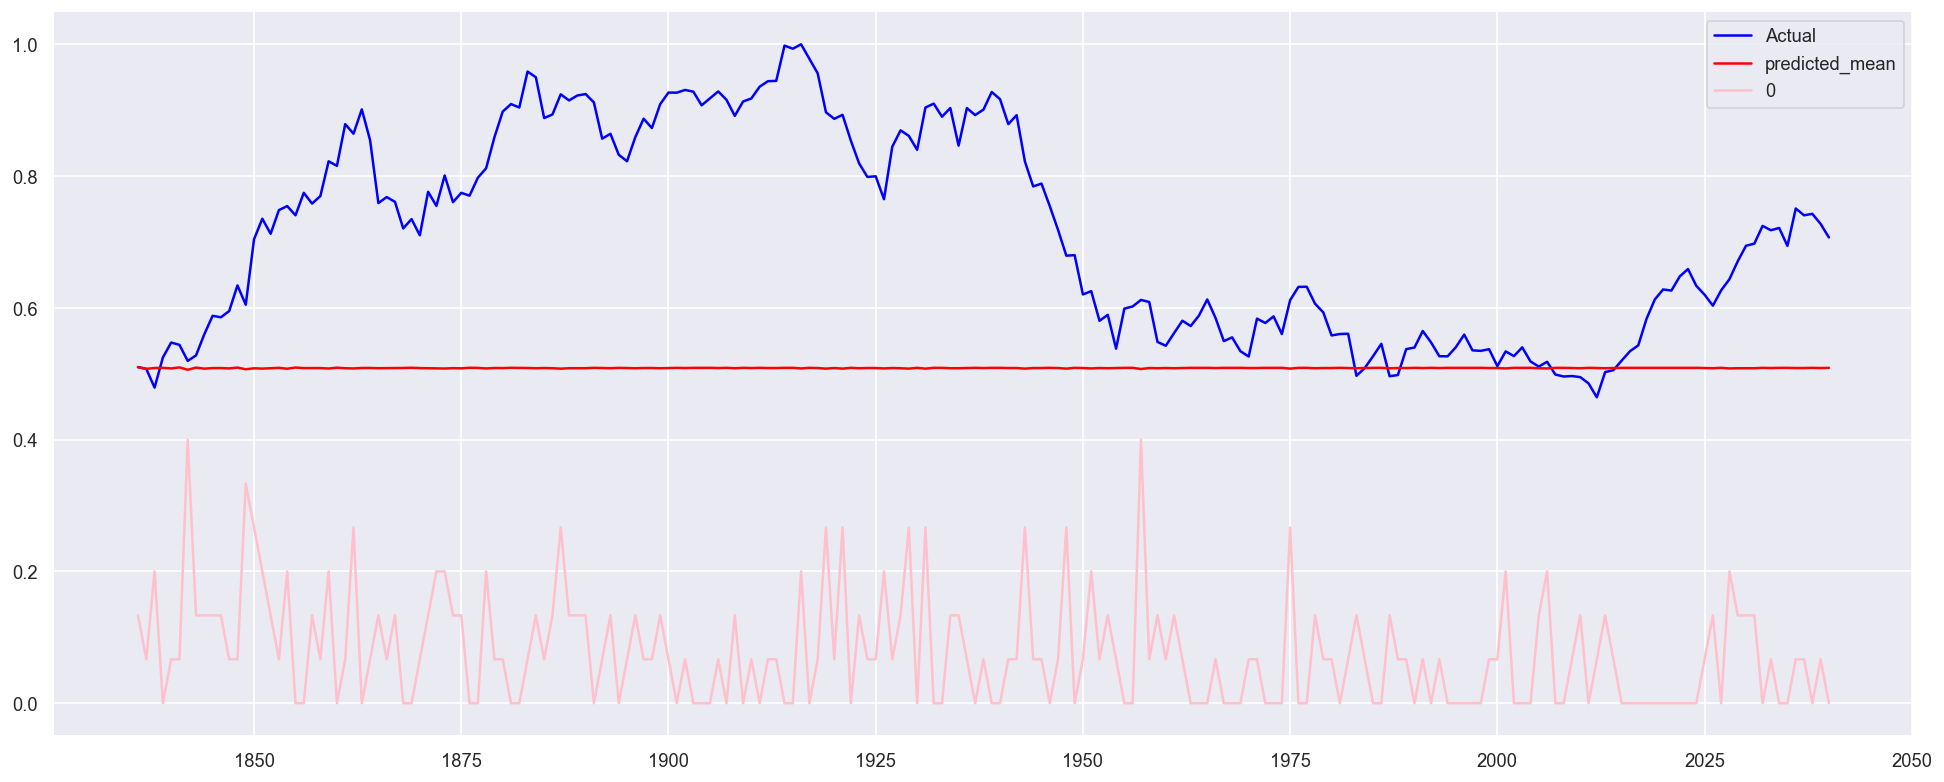

In [279]:
predictions['Actual'].plot(figsize=(20,8), legend=True, color='blue')
predictions['predicted_mean'].plot(legend=True, color='red', figsize=(20,8))
test_X[0].plot(legend=True, color='pink', figsize=(20,8))